In [1]:
library("ggplot2")
library("dplyr")
library("repr")
library("reshape2")
library("stats")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
players = read.csv("./fifa23_players_data.csv")
head(players)

,Known.As,Full.Name,Overall,Potential,Value.in.Euro.,Positions.Played,Best.Position,Nationality,Image.Link,Age,⋯,LM.Rating,CM.Rating,RM.Rating,LWB.Rating,CDM.Rating,RWB.Rating,LB.Rating,CB.Rating,RB.Rating,GK.Rating
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,⋯,91,88,91,67,66,67,62,53,62,22
2,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,⋯,89,84,89,67,67,67,63,58,63,21
3,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,⋯,86,83,86,67,69,67,64,63,64,22
4,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,⋯,91,91,91,82,82,82,78,72,78,24
5,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,⋯,92,84,92,70,66,70,66,57,66,21
6,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,⋯,90,85,90,74,71,74,70,61,70,25


In [6]:
colnames(players)

[1] "Known.As"                    "Full.Name"                  
 [3] "Overall"                     "Potential"                  
 [5] "Value.in.Euro."              "Positions.Played"           
 [7] "Best.Position"               "Nationality"                
 [9] "Image.Link"                  "Age"                        
[11] "Height.in.cm."               "Weight.in.kg."              
[13] "TotalStats"                  "BaseStats"                  
[15] "Club.Name"                   "Wage.in.Euro."              
[17] "Release.Clause"              "Club.Position"              
[19] "Contract.Until"              "Club.Jersey.Number"         
[21] "Joined.On"                   "On.Loan"                    
[23] "Preferred.Foot"              "Weak.Foot.Rating"           
[25] "Skill.Moves"                 "International.Reputation"   
[27] "National.Team.Name"          "National.Team.Image.Link"   
[29] "National.Team.Position"      "National.Team.Jersey.Number"
[31] "Attacking.Work.Rate"         "Defensive.Work.Rate"        
[33] "Pace.Total"                  "Shooting.Total"             
[35] "Passing.Total"               "Dribbling.Total"            
[37] "Defending.Total"             "Physicality.Total"          
[39] "Crossing"                    "Finishing"                  
[41] "Heading.Accuracy"            "Short.Passing"              
[43] "Volleys"                     "Dribbling"                  
[45] "Curve"                       "Freekick.Accuracy"          
[47] "LongPassing"                 "BallControl"                
[49] "Acceleration"                "Sprint.Speed"               
[51] "Agility"                     "Reactions"                  
[53] "Balance"                     "Shot.Power"                 
[55] "Jumping"                     "Stamina"                    
[57] "Strength"                    "Long.Shots"                 
[59] "Aggression"                  "Interceptions"              
[61] "Positioning"                 "Vision"                     
[63] "Penalties"                   "Composure"                  
[65] "Marking"                     "Standing.Tackle"            
[67] "Sliding.Tackle"              "Goalkeeper.Diving"          
[69] "Goalkeeper.Handling"         "GoalkeeperKicking"          
[71] "Goalkeeper.Positioning"      "Goalkeeper.Reflexes"        
[73] "ST.Rating"                   "LW.Rating"                  
[75] "LF.Rating"                   "CF.Rating"                  
[77] "RF.Rating"                   "RW.Rating"                  
[79] "CAM.Rating"                  "LM.Rating"                  
[81] "CM.Rating"                   "RM.Rating"                  
[83] "LWB.Rating"                  "CDM.Rating"                 
[85] "RWB.Rating"                  "LB.Rating"                  
[87] "CB.Rating"                   "RB.Rating"                  
[89] "GK.Rating"

In [3]:
teams = read.csv("./fifa23_teams_data.csv")
head(teams)

,ID,Name,League,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,1943,AFC Bournemouth,English Premier League (1),13,74,75,73,73,0,2,1,28,25.8,25.5
2,116418,AFC Richmond,English Premier League (1),13,78,81,79,77,0,5,3,19,27.3,27.3
3,1,Arsenal,English Premier League (1),13,80,83,81,79,0,7,7,29,24.1,23.0
4,2,Aston Villa,English Premier League (1),13,79,79,78,80,0,5,3,32,25.8,25.2
5,1925,Brentford,English Premier League (1),13,75,75,74,75,0,1,1,30,25.4,24.2
6,1808,Brighton & Hove Albion,English Premier League (1),13,76,76,75,77,0,3,2,31,27.6,23.6


In [7]:
team_only = teams[["Name"]]
head(team_only)

[1] "AFC Bournemouth"        "AFC Richmond"           "Arsenal"               
[4] "Aston Villa"            "Brentford"              "Brighton & Hove Albion"

In [9]:
# combined <- merge(players, team_only, by = "Club Name", all.x = TRUE)
# head(combined)

ERROR: Error in fix.by(by.x, x): 'by' must specify a uniquely valid column


In [22]:
data <- players[c('Nationality', 'Overall', 'Value.in.Euro.', 'Wage.in.Euro.', 'Crossing', 'Sprint.Speed', 'Acceleration', 'Height.in.cm.','Weight.in.kg.')]
head(data)
dim(data)

,Nationality,Overall,Value.in.Euro.,Wage.in.Euro.,Crossing,Sprint.Speed,Acceleration,Height.in.cm.,Weight.in.kg.
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Argentina,91,54000000,195000,84,76,87,169,67
2,France,91,64000000,450000,75,80,79,185,81
3,Poland,91,84000000,420000,71,75,76,185,81
4,Belgium,91,107500000,350000,94,73,76,181,70
5,France,91,190500000,230000,78,97,97,182,73
6,Egypt,90,115500000,270000,80,91,89,175,71


[1] 18539     9

In [23]:
#Rename column
colnames(data)[3] <- "Value"
colnames(data)[4] <- "Wage"
colnames(data)[8] <- "Height"
colnames(data)[9] <- "Weight"
head(data)

,Nationality,Overall,Value,Wage,Crossing,Sprint.Speed,Acceleration,Height,Weight
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Argentina,91,54000000,195000,84,76,87,169,67
2,France,91,64000000,450000,75,80,79,185,81
3,Poland,91,84000000,420000,71,75,76,185,81
4,Belgium,91,107500000,350000,94,73,76,181,70
5,France,91,190500000,230000,78,97,97,182,73
6,Egypt,90,115500000,270000,80,91,89,175,71


In [24]:
#Summary of these all features
summary(data)

 Nationality           Overall          Value                Wage       
 Length:18539       Min.   :47.00   Min.   :        0   Min.   :     0  
 Class :character   1st Qu.:62.00   1st Qu.:   475000   1st Qu.:  1000  
 Mode  :character   Median :66.00   Median :  1000000   Median :  3000  
                    Mean   :65.85   Mean   :  2875461   Mean   :  8824  
                    3rd Qu.:70.00   3rd Qu.:  2000000   3rd Qu.:  8000  
                    Max.   :91.00   Max.   :190500000   Max.   :450000  
    Crossing      Sprint.Speed    Acceleration       Height     
 Min.   : 6.00   Min.   :15.00   Min.   :14.00   Min.   :155.0  
 1st Qu.:39.00   1st Qu.:57.00   1st Qu.:57.00   1st Qu.:177.0  
 Median :54.00   Median :68.00   Median :68.00   Median :182.0  
 Mean   :49.48   Mean   :64.84   Mean   :64.73   Mean   :181.6  
 3rd Qu.:63.00   3rd Qu.:75.00   3rd Qu.:75.00   3rd Qu.:186.0  
 Max.   :94.00   Max.   :97.00   Max.   :97.00   Max.   :206.0  
     Weight      
 Min.   : 49.00 

In [48]:
summary(data$Wage)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1000    3000    8824    8000  450000 

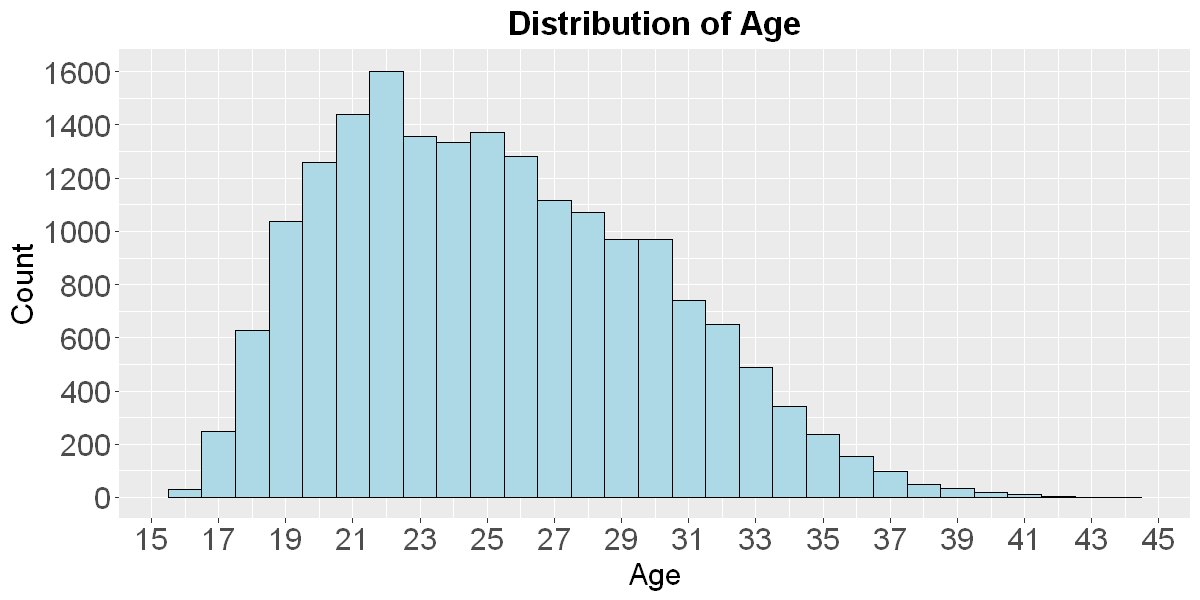

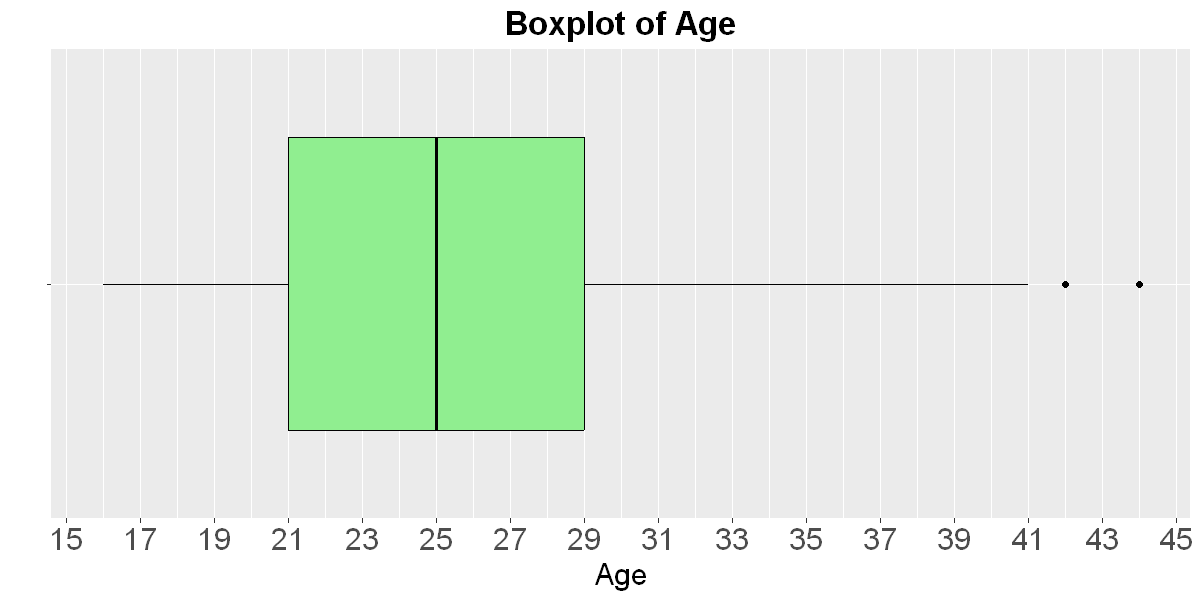

In [48]:
options(repr.plot.width = 10, repr.plot.height = 5) 
#Create the histogram
histogram <- ggplot(data, aes(x = Age)) + 
  geom_histogram(binwidth = 1, color = "black", fill = "lightblue") +
  
  # Add axis labels and adjust tick marks
  labs(x = "Age", y = "Count", title = "Distribution of Age") +
  scale_x_continuous(breaks = seq(15, 45, by = 2)) +
  scale_y_continuous(breaks = seq(0, 1600, by = 200)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) 

#Create the boxplot
boxplot <- ggplot(data, aes(x = "", y = Age)) +
  geom_boxplot(color = "black", fill = "lightgreen") +

  # Add axis labels and adjust tick marks
  labs(x = "", y = "Age", title = "Boxplot of Age") +
  scale_y_continuous(breaks = seq(15, 45, by = 2)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) +
  coord_flip() 

plot(histogram)
plot(boxplot)

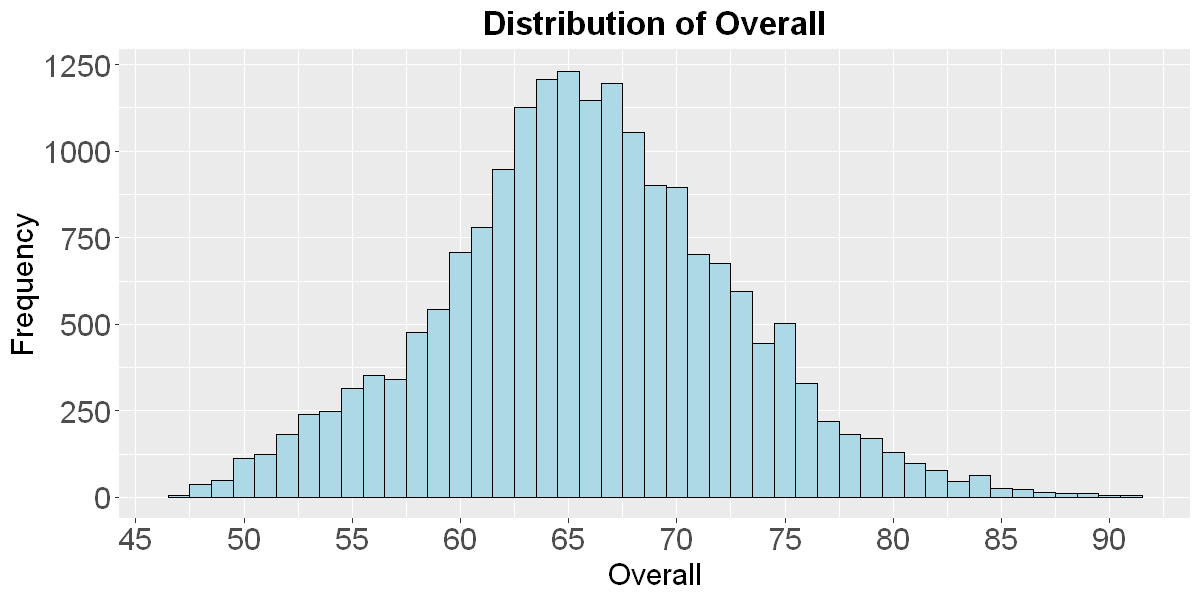

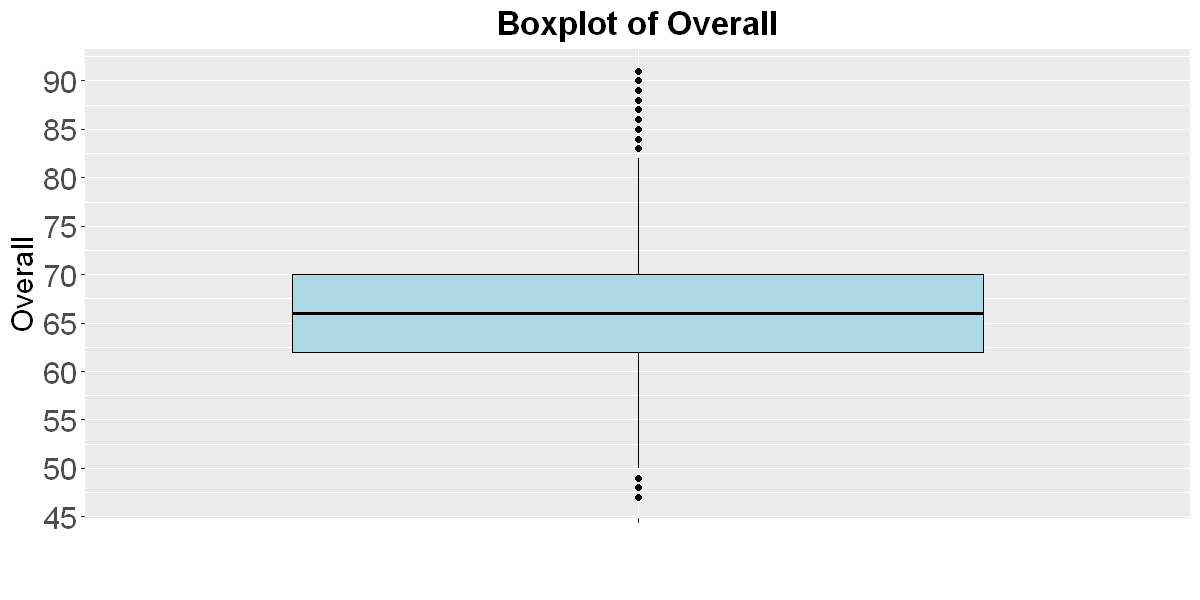

In [55]:
#Create the histogram
histogram <- ggplot(data, aes(x = Overall)) + 
  geom_histogram(binwidth = 1, color = "black", fill = "lightblue") +
  
  # Add axis labels and adjust tick marks
  labs(x = "Overall", y = "Frequency", title = "Distribution of Overall") +
  scale_x_continuous(breaks = seq(45, 95, by = 5)) + 

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) 

#Create the boxplot
boxplot <- ggplot(data, aes(x = "", y = Overall)) +
  geom_boxplot(color = "black", fill = "lightblue") +

  # Add axis labels and adjust tick marks
  labs(x = "", y = "Overall", title = "Boxplot of Overall") +
  scale_y_continuous(breaks = seq(45, 95, by = 5)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) 


plot(histogram)
plot(boxplot)

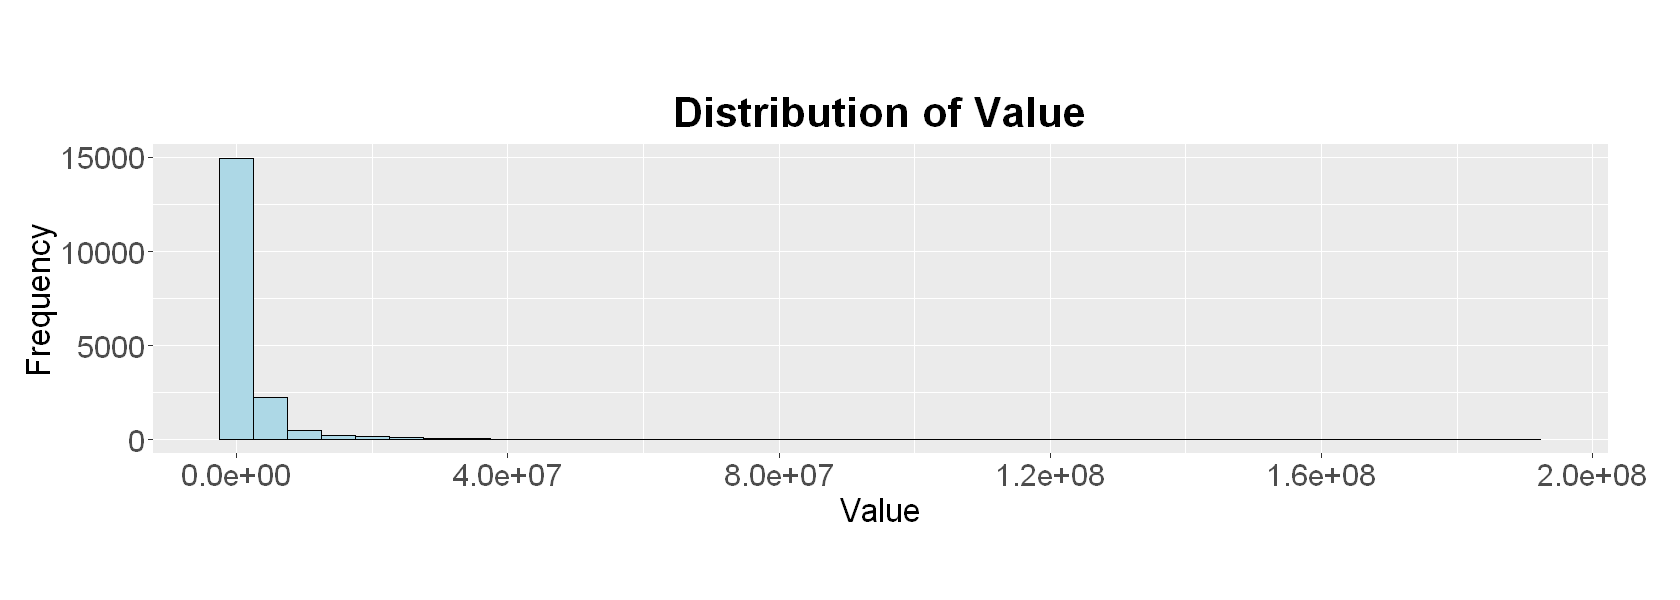

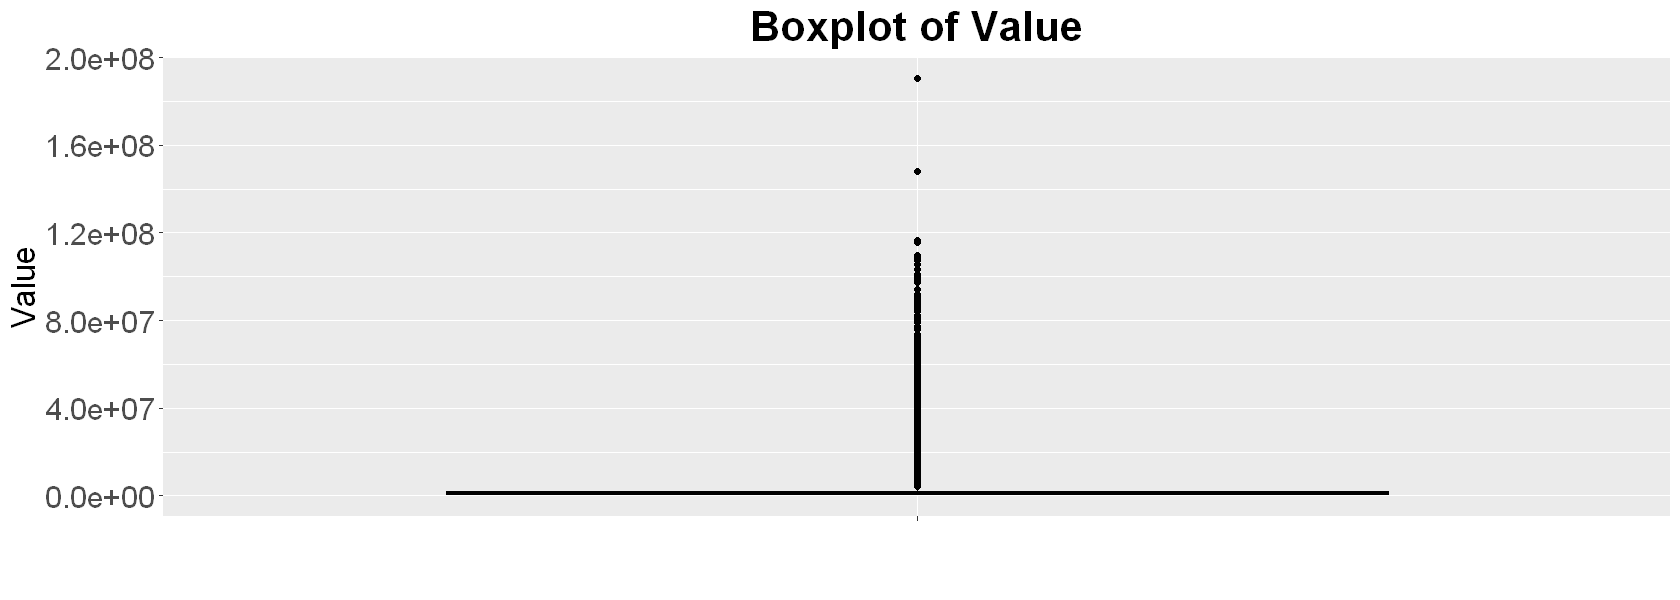

In [58]:
#Create the histogram
options(repr.plot.width = 14, repr.plot.height = 5) 

histogram <- ggplot(data, aes(x = Value)) + 
  geom_histogram(binwidth = 5000000, color = "black", fill = "lightblue") +
  
  # Add axis labels and adjust tick marks
  labs(x = "Value", y = "Frequency", title = "Distribution of Value") +
  scale_x_continuous(breaks = seq(0, 200000000, 40000000)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 25, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 18),
        plot.margin = unit(c(4, 3, 3, 1), 'lines')) 

# Create the boxplot
boxplot <- ggplot(data, aes(x = "", y = Value)) +
  geom_boxplot(color = "black", fill = "lightblue") +

  # Add axis labels and adjust tick marks
  labs(x = "", y = "Value", title = "Boxplot of Value") +
  scale_y_continuous(breaks = seq(0, 200000000, 40000000)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 25, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 18)) 

plot(histogram)
plot(boxplot)

In [ ]:
summary(data$Wage)

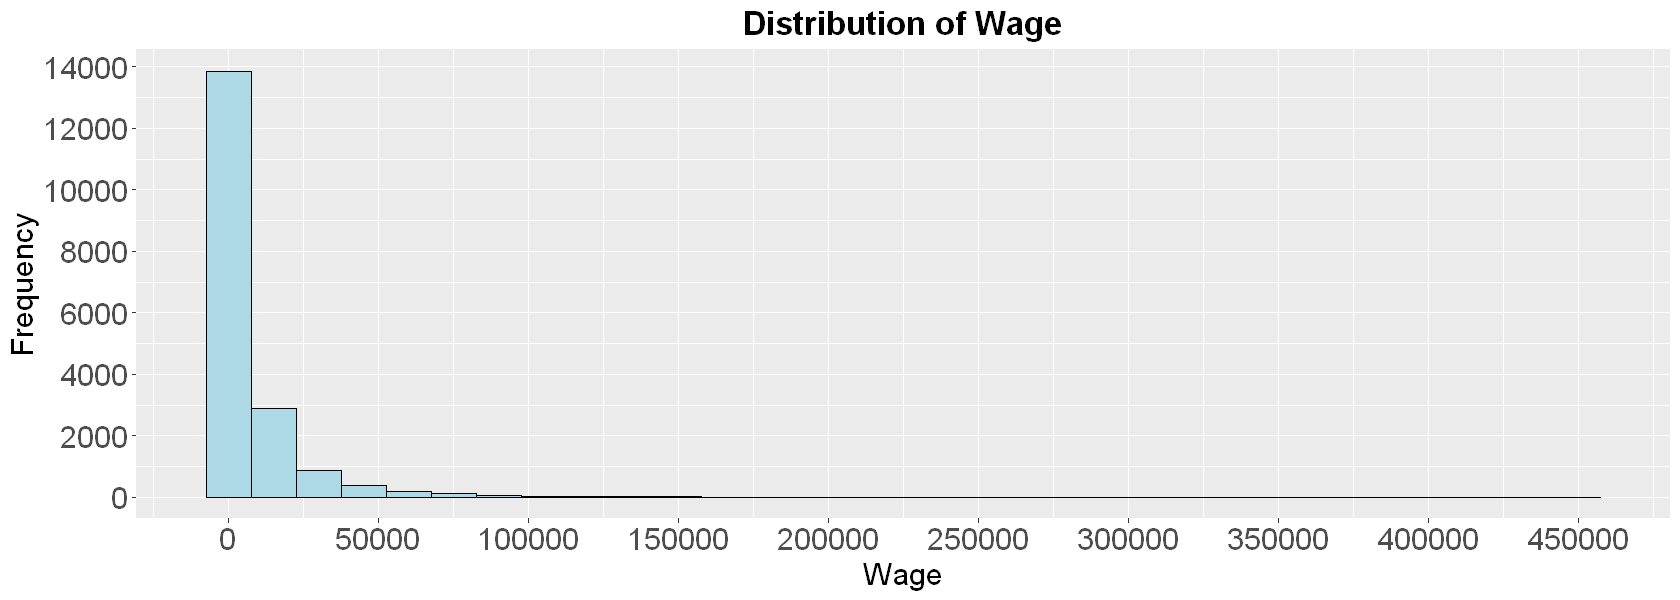

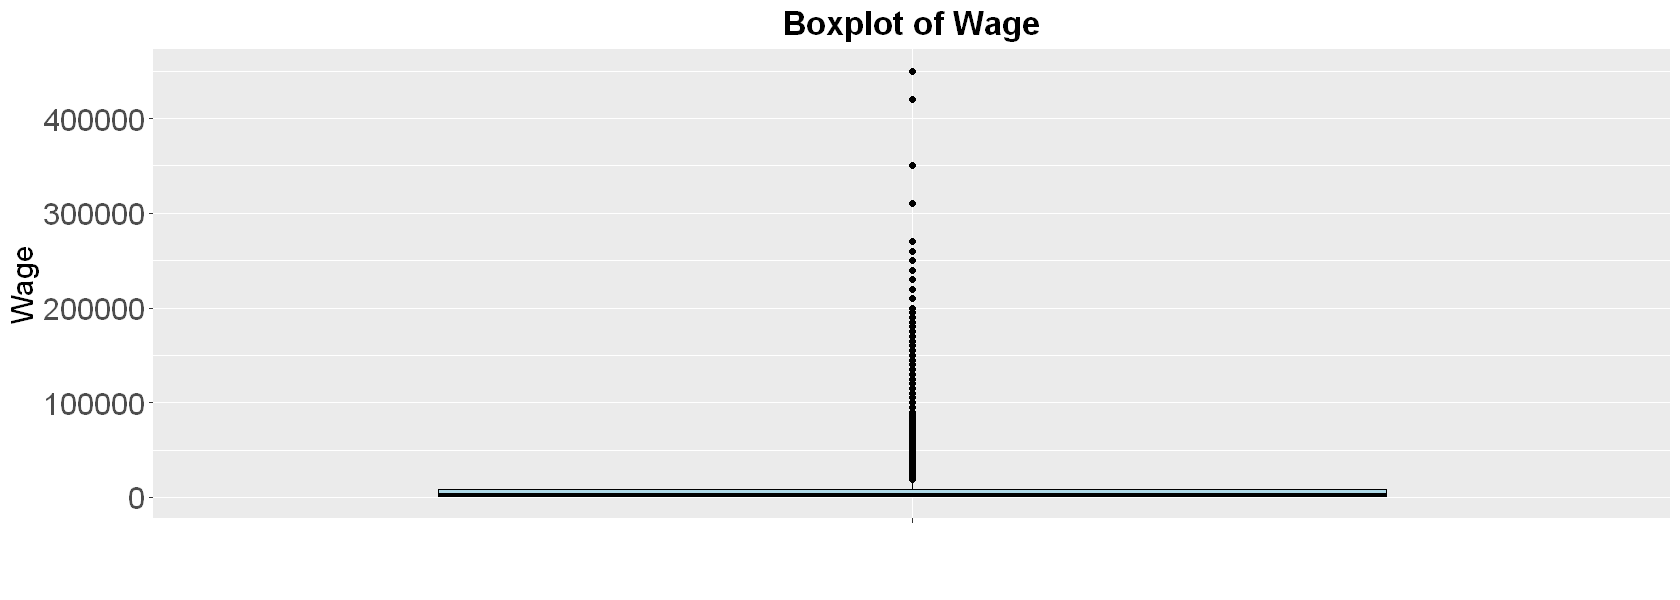

In [18]:
options(repr.plot.width = 14, repr.plot.height = 5) 
#Create the histogram
histogram <- ggplot(data, aes(x = Wage)) + 
  geom_histogram(binwidth = 15000, color = "black", fill = "lightblue") +
  
  # Add axis labels and adjust tick marks
  labs(x = "Wage", y = "Frequency", title = "Distribution of Wage") +
  scale_x_continuous(breaks = seq(0, 450000, by = 50000)) +
  scale_y_continuous(breaks = seq(0, 15000, by = 2000)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) 

#Create the boxplot
boxplot <- ggplot(data, aes(x = "", y = Wage)) +
  geom_boxplot(color = "black", fill = "lightblue") +

  # Add axis labels and adjust tick marks
  labs(x = "", y = "Wage", title = "Boxplot of Wage") +
  scale_y_continuous(breaks = seq(0, 450000, by = 100000), labels = function(y) format(y, scientific = FALSE)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) 

plot(histogram)
plot(boxplot)

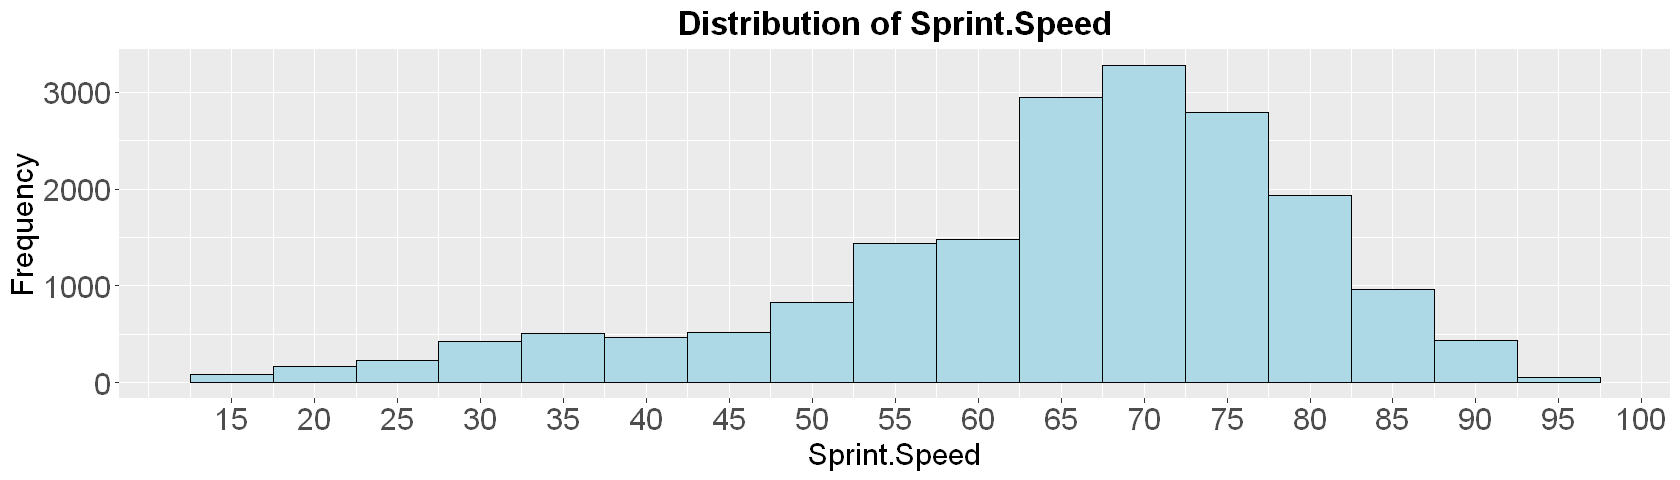

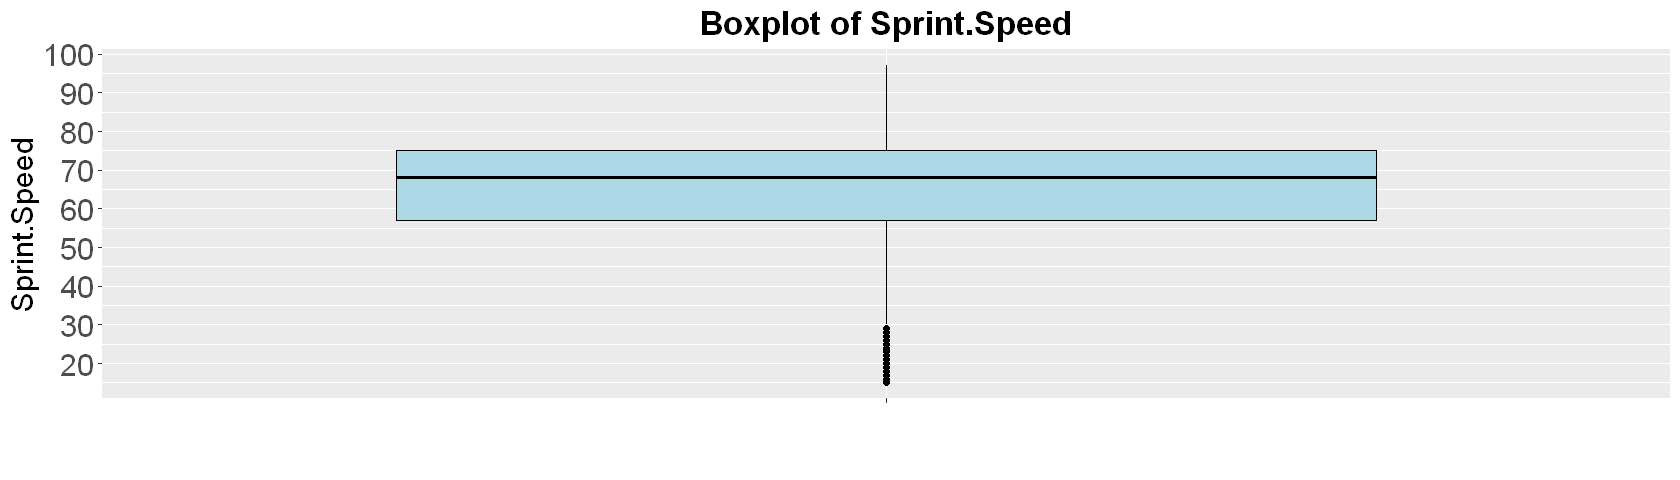

In [12]:
options(repr.plot.width = 14, repr.plot.height = 4) 

#Create the histogram
histogram <- ggplot(data, aes(x = Sprint.Speed)) + 
  geom_histogram(binwidth = 5, color = "black", fill = "lightblue") +
  
  # Add axis labels and adjust tick marks
  labs(x = "Sprint.Speed", y = "Frequency", title = "Distribution of Sprint.Speed") +
  scale_x_continuous(breaks = seq(15, 100, by = 5)) + 

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) 

#Create the boxplot
boxplot <- ggplot(data, aes(x = "", y = Sprint.Speed)) +
  geom_boxplot(color = "black", fill = "lightblue") +

  # Add axis labels and adjust tick marks
  labs(x = "", y = "Sprint.Speed", title = "Boxplot of Sprint.Speed") +
  scale_y_continuous(breaks = seq(10, 100, by = 10)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) 


plot(histogram)
plot(boxplot)

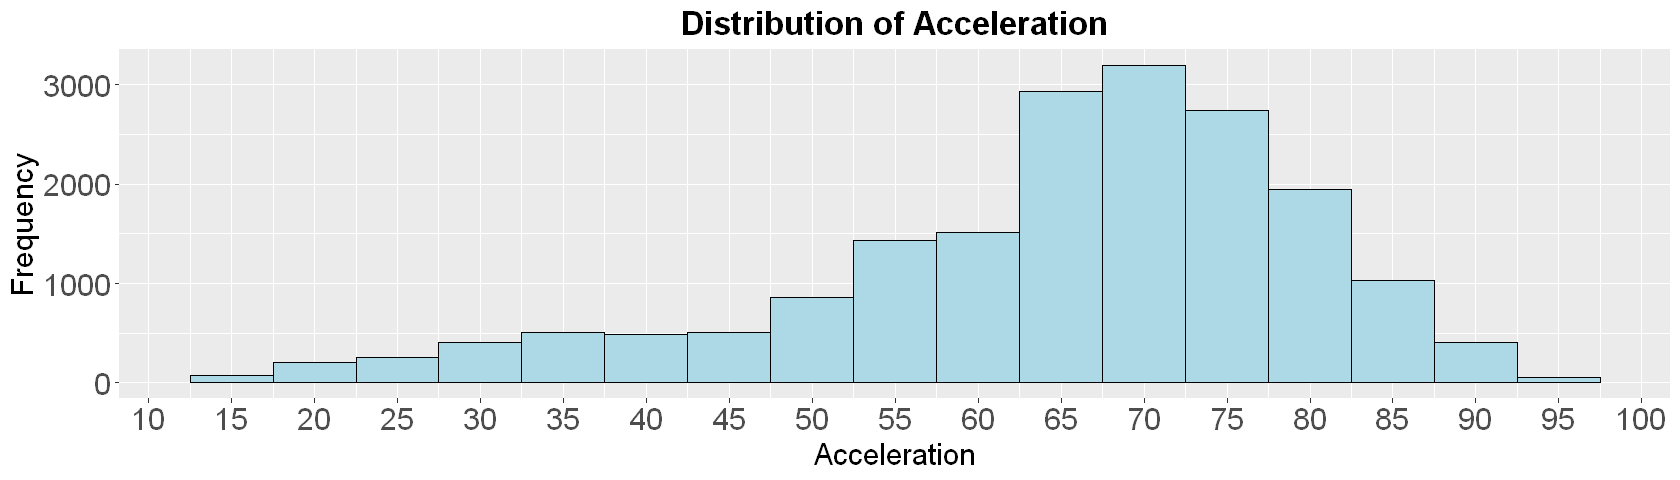

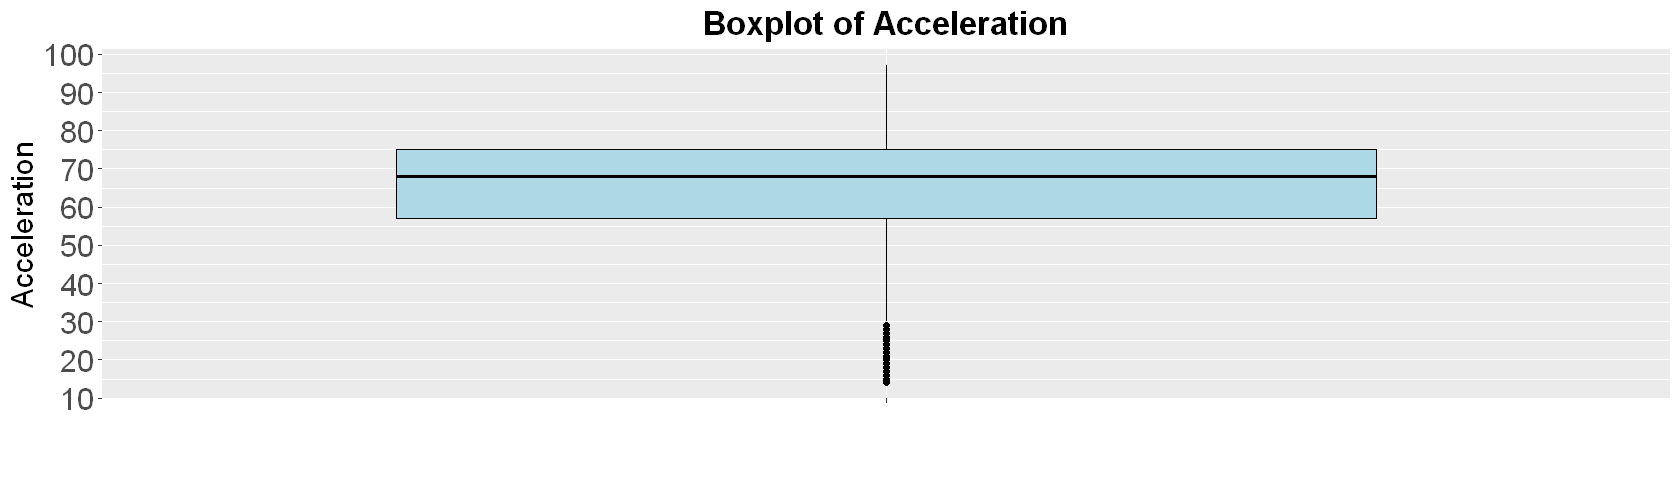

In [15]:
options(repr.plot.width = 14, repr.plot.height = 4) 

#Create the histogram
histogram <- ggplot(data, aes(x = Acceleration)) + 
  geom_histogram(binwidth = 5, color = "black", fill = "lightblue") +
  
  # Add axis labels and adjust tick marks
  labs(x = "Acceleration", y = "Frequency", title = "Distribution of Acceleration") +
  scale_x_continuous(breaks = seq(10, 100, by = 5)) + 

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) 

#Create the boxplot
boxplot <- ggplot(data, aes(x = "", y = Acceleration)) +
  geom_boxplot(color = "black", fill = "lightblue") +

  # Add axis labels and adjust tick marks
  labs(x = "", y = "Acceleration", title = "Boxplot of Acceleration") +
  scale_y_continuous(breaks = seq(10, 100, by = 10)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) 


plot(histogram)
plot(boxplot)

In [7]:
zero_Value <- sum(data$Value == 0)
zero_Wage <- sum(data$Wage == 0)
zero_Value
zero_Wage

[1] 104

[1] 0

In [25]:
#Remove data with Value == 0
zero_rm_data <- data[data$Value != 0, ]
dim(data)
dim(zero_rm_data)

[1] 18539     9

[1] 18435     9

In [26]:
#Log transformation of the Value
zero_rm_data$Value_log <- log(zero_rm_data$Value)
zero_rm_data$Wage_log <- log(zero_rm_data$Wage)
summary(zero_rm_data$Value_log)
summary(zero_rm_data$Wage_log)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.105  13.122  13.816  13.894  14.509  19.065 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.215   6.908   8.006   8.057   8.987  13.017 

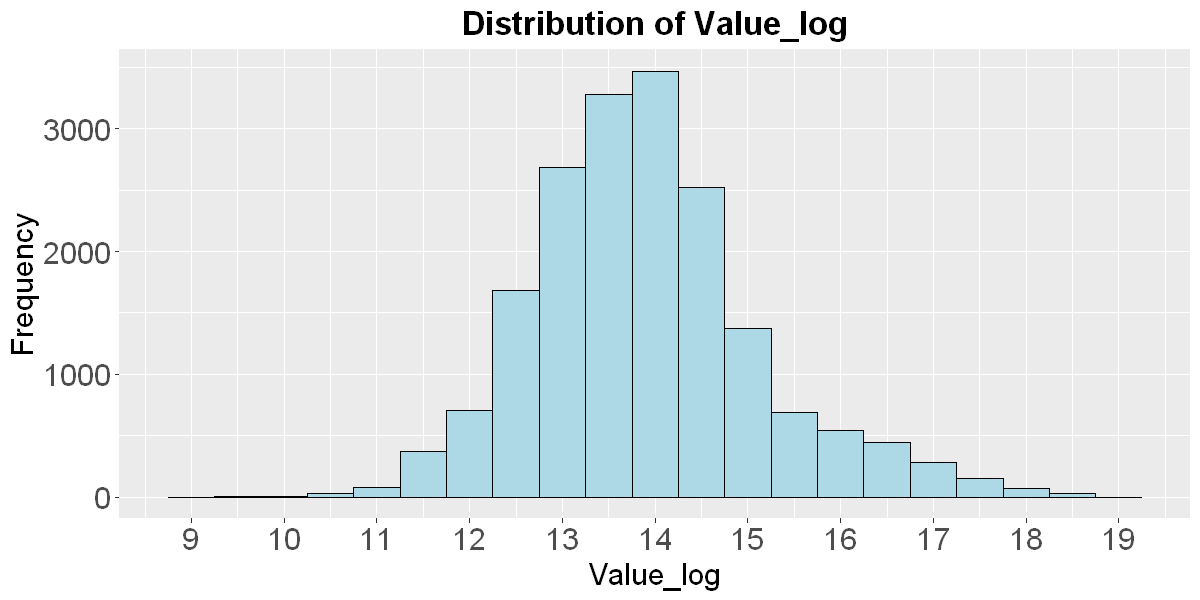

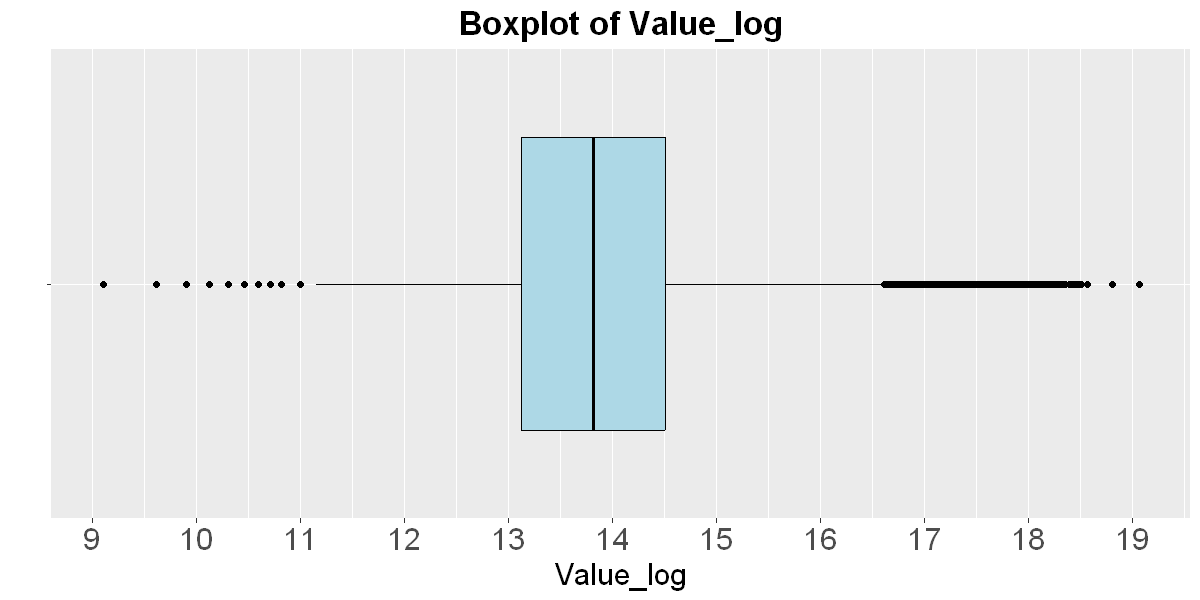

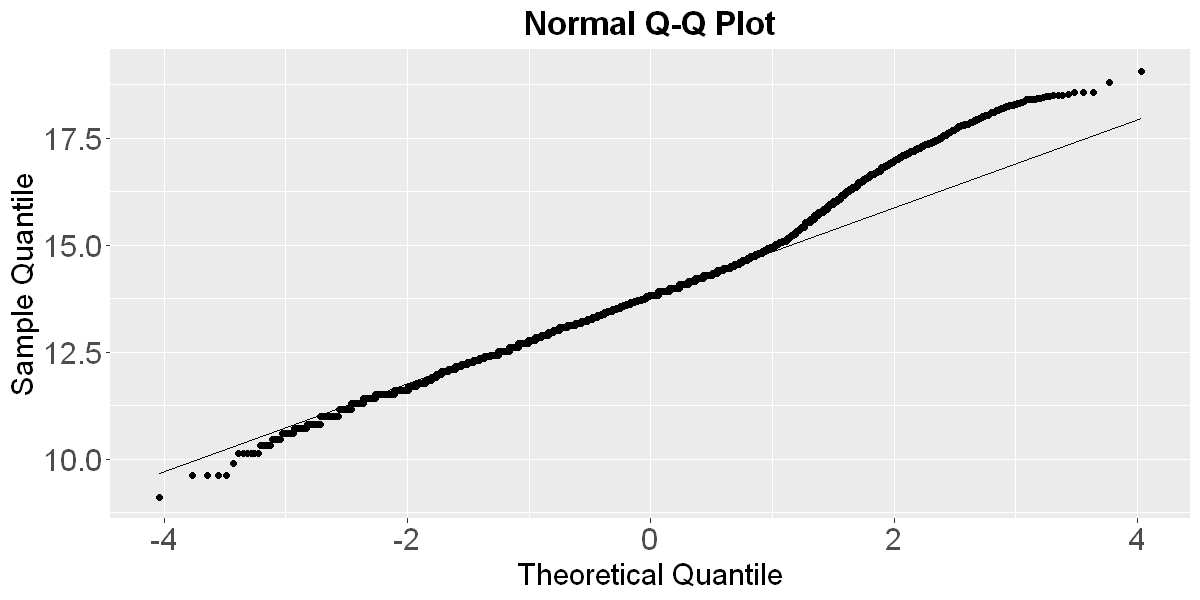

In [16]:
options(repr.plot.width=10, repr.plot.height=5) 
#Create the histogram
histogram <- ggplot(zero_rm_data, aes(x = Value_log)) + 
  geom_histogram(binwidth = 0.5, color = "black", fill = "lightblue") +
  
  # Add axis labels and adjust tick marks
  labs(x = "Value_log", y = "Frequency", title = "Distribution of Value_log") +
  scale_x_continuous(breaks = seq(8, 20, by = 1)) + 

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) 

# Create the boxplot
boxplot <- ggplot(zero_rm_data, aes(x = "", y = Value_log)) +
  geom_boxplot(color = "black", fill = "lightblue") +

  # Add axis labels and adjust tick marks
  labs(x = "", y = "Value_log", title = "Boxplot of Value_log") +
  scale_y_continuous(breaks = seq(8, 20, by = 1)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) +
  coord_flip() 

#Create the qqplot
qqplot <- ggplot(zero_rm_data, aes(sample = Value_log)) +
    stat_qq() + stat_qq_line() +

    labs(x = "Theoretical Quantile", y = "Sample Quantile", title = "Normal Q-Q Plot") +
    theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
          axis.title = element_text(size = 18),
          axis.text = element_text(size = 18))

plot(histogram)
plot(boxplot)
plot(qqplot)

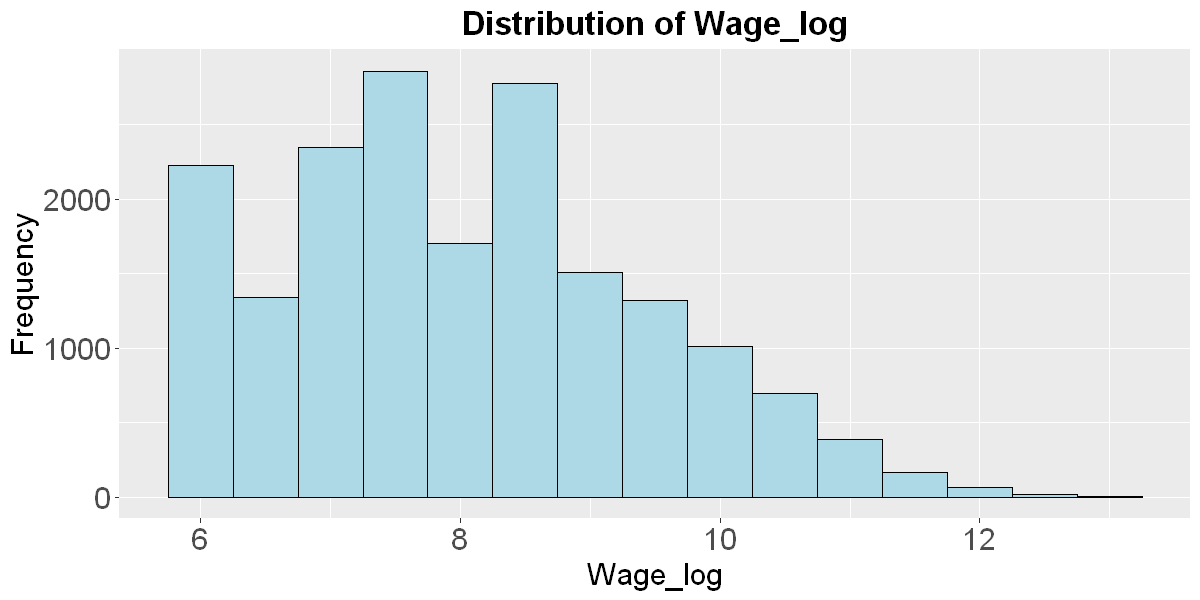

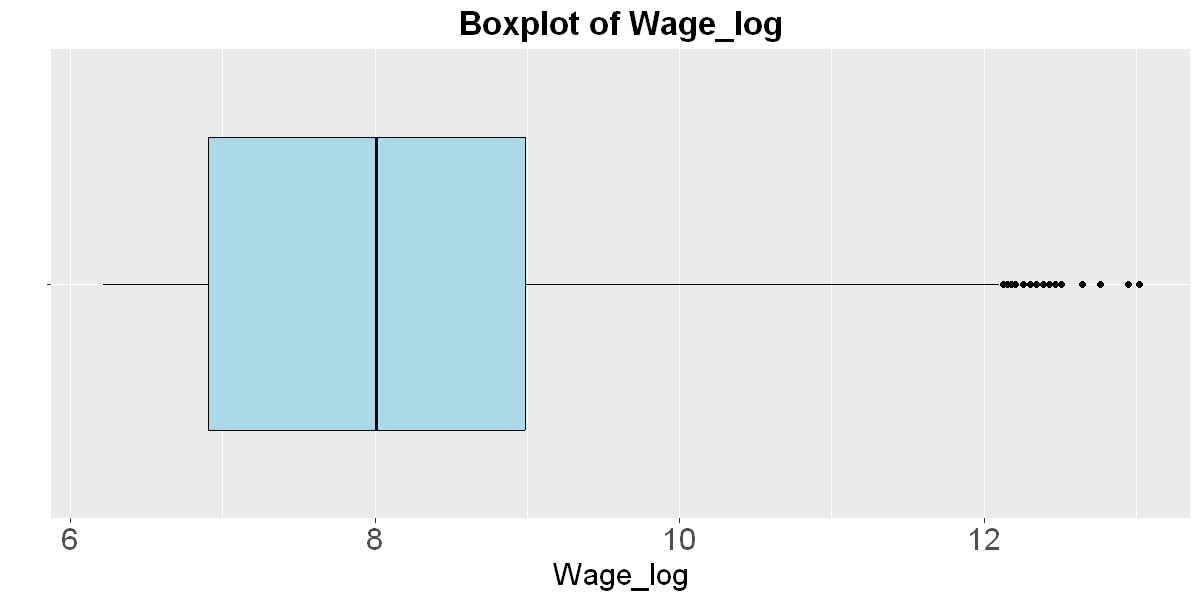

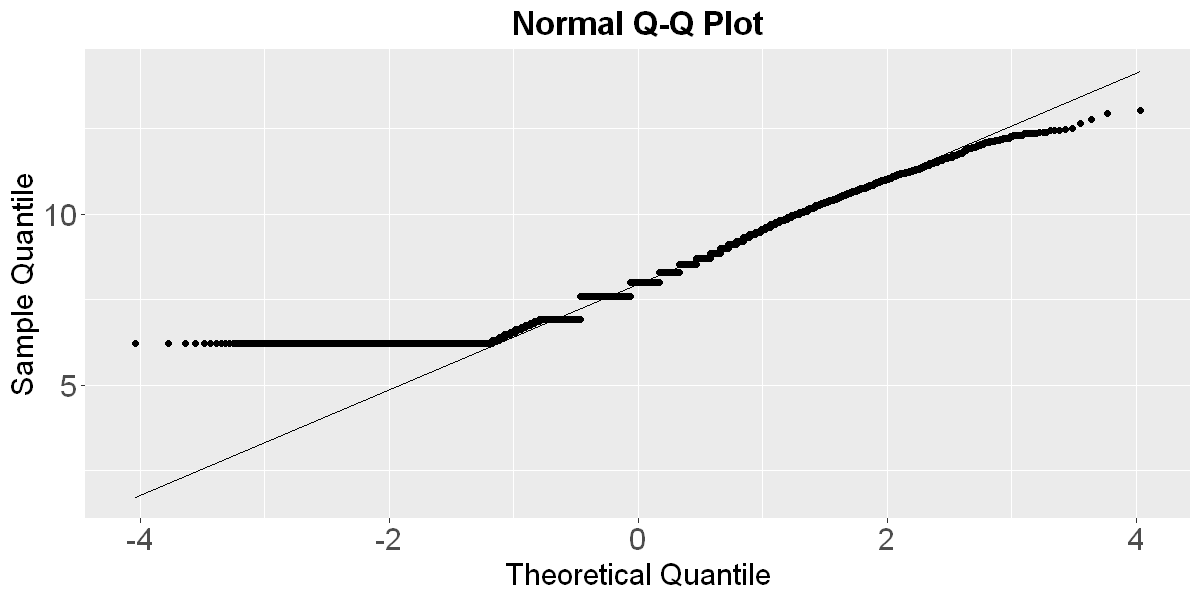

In [17]:
options(repr.plot.width=10, repr.plot.height=5) 
#Create the histogram
histogram <- ggplot(zero_rm_data, aes(x = Wage_log)) + 
  geom_histogram(binwidth = 0.5, color = "black", fill = "lightblue") +
  
  # Add axis labels and adjust tick marks
  labs(x = "Wage_log", y = "Frequency", title = "Distribution of Wage_log") +
#   scale_x_continuous(breaks = seq(6, 14, by = 1)) + 

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) 

# Create the boxplot
boxplot <- ggplot(zero_rm_data, aes(x = "", y = Wage_log)) +
  geom_boxplot(color = "black", fill = "lightblue") +

  # Add axis labels and adjust tick marks
  labs(x = "", y = "Wage_log", title = "Boxplot of Wage_log") +
#   scale_y_continuous(breaks = seq(6, 14, by = 1)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) +
  coord_flip() 

#Create the qqplot
qqplot <- ggplot(zero_rm_data, aes(sample = Wage_log)) +
    stat_qq() + stat_qq_line() +

    labs(x = "Theoretical Quantile", y = "Sample Quantile", title = "Normal Q-Q Plot") +
    theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
          axis.title = element_text(size = 18),
          axis.text = element_text(size = 18))

plot(histogram)
plot(boxplot)
plot(qqplot)

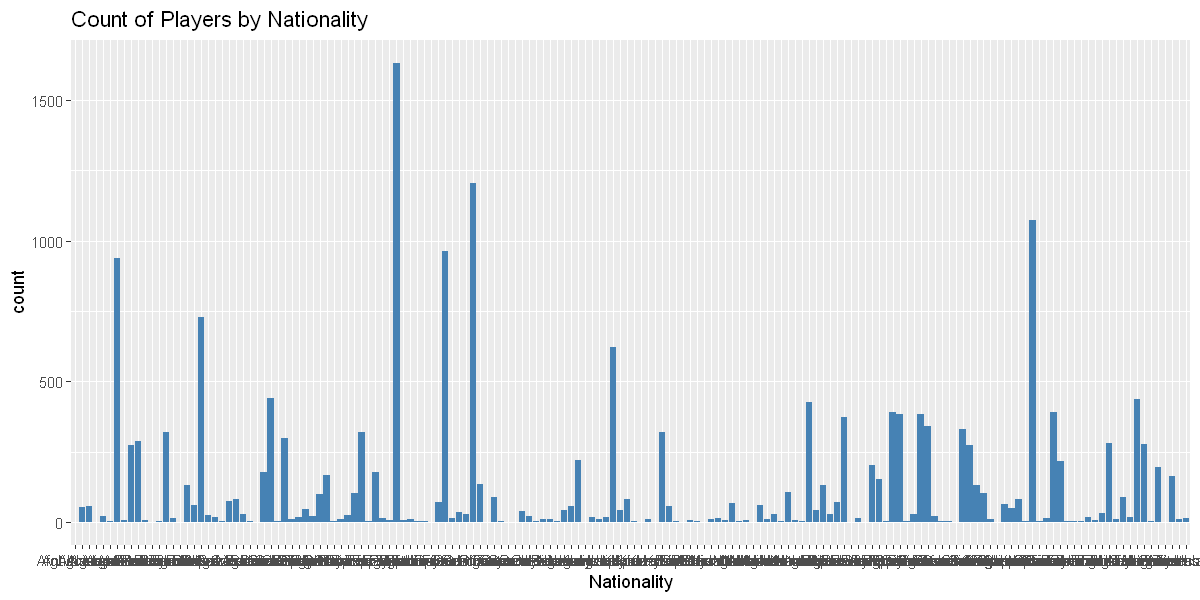

In [109]:
#Create the barplot
ggplot(data, aes(x = Nationality)) +
  geom_bar(fill = "steelblue") +
  ggtitle("Count of Players by Nationality")

In [110]:
#Count how many distinct categories
distinct_count <- data %>% 
  distinct(Nationality) %>% 
  count()

# Print the count
print(distinct_count$n)

[1] 160


In [73]:
library(treemap)
library(treemapify)

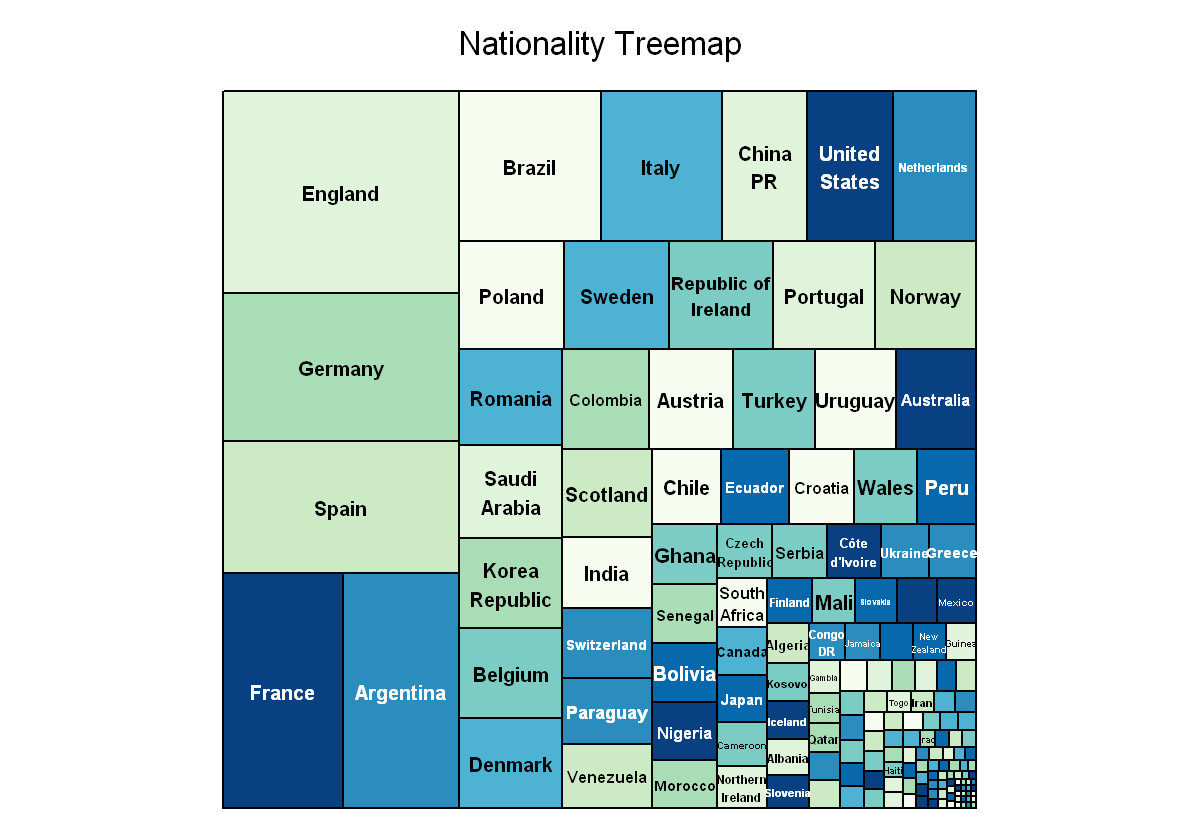

In [77]:
options(repr.plot.width=10, repr.plot.height=7) 

nationality_counts <- data.frame(table(players$Nationality))
colnames(nationality_counts) <- c("Nationality", "Count")

treemap(nationality_counts, index = "Nationality", vSize = "Count",
        fontsize.labels = 12,
        palette = "GnBu",
        title = "Nationality Treemap",
        fontsize.title = 20)

In [63]:
data_cat <- players[c('Best.Position', 'Club.Jersey.Number', 'Nationality', 'Contract.Until')]
head(data_cat)
dim(data_cat)

,Best.Position,Club.Jersey.Number,Nationality,Contract.Until
,<chr>,<chr>,<chr>,<chr>
1,CAM,30,Argentina,2023
2,CF,9,France,2023
3,ST,9,Poland,2025
4,CM,17,Belgium,2025
5,ST,7,France,2024
6,RW,11,Egypt,2023


[1] 18539     4

In [49]:
table(data_cat$Best.Position)
table(data_cat$Club.Jersey.Number)
table(data_cat$Contract.Until)
table(data_cat$Nationality)


 CAM   CB  CDM   CF   CM   GK   LB   LM   LW  LWB   RB   RM   RW  RWB   ST 
2311 3658 1403   70 1104 2061  864  797  215  404  925 1443  297  422 2565 


  -   1  10  11  12  13  14  15  16  17  18  19   2  20  21  22  23  24  25  26 
 92 577 579 593 352 381 521 451 473 543 536 527 509 531 530 512 526 436 399 386 
 27  28  29   3  30  31  32  33  34  35  36  37  38  39   4  40  41  42  43  44 
429 365 372 533 401 281 292 304 187 174 150 154 109 128 586 125  77  89  45 116 
 45  46  47  48  49   5  50  51  52  53  54  55  56  57  58  59   6  60  61  62 
 59  31  46  19  18 570  44  15  13  13  15  40   9  10  10  19 586   7  19  10 
 63  64  65  66  67  68  69   7  70  71  72  73  74  75  76  77  78  79   8  80 
  8   9   5  34   8   5   5 599  48  23  15  10  12   7  11 124   9  10 600  34 
 81  82  83  84  85  86  87  88  89   9  90  91  92  93  94  95  96  97  98  99 
 12  10   6   6   8   5  13  50  15 573  49  21  18  26  21  17  17  28  33 111 


   - 2022 2023 2024 2025 2026 2027 2028 2031 2032 
  92 2372 6796 4467 2968 1204  611   25    2    2 


             Afghanistan                  Albania                  Algeria 
                       1                       52                       58 
                 Andorra                   Angola      Antigua and Barbuda 
                       1                       20                        3 
               Argentina                  Armenia                Australia 
                     937                        8                      275 
                 Austria               Azerbaijan                 Barbados 
                     289                        7                        1 
                 Belarus                  Belgium                    Benin 
                       3                      318                       15 
                 Bermuda                  Bolivia   Bosnia and Herzegovina 
                       1                      131                       62 
                  Brazil                 Bulgaria             Burkina Faso 
           

In [9]:
#Count how many distinct categories
distinct_count <- data_cat %>% 
  distinct(Club.Jersey.Number) %>% 
  count()

# Print the count
print(distinct_count$n)

[1] 100


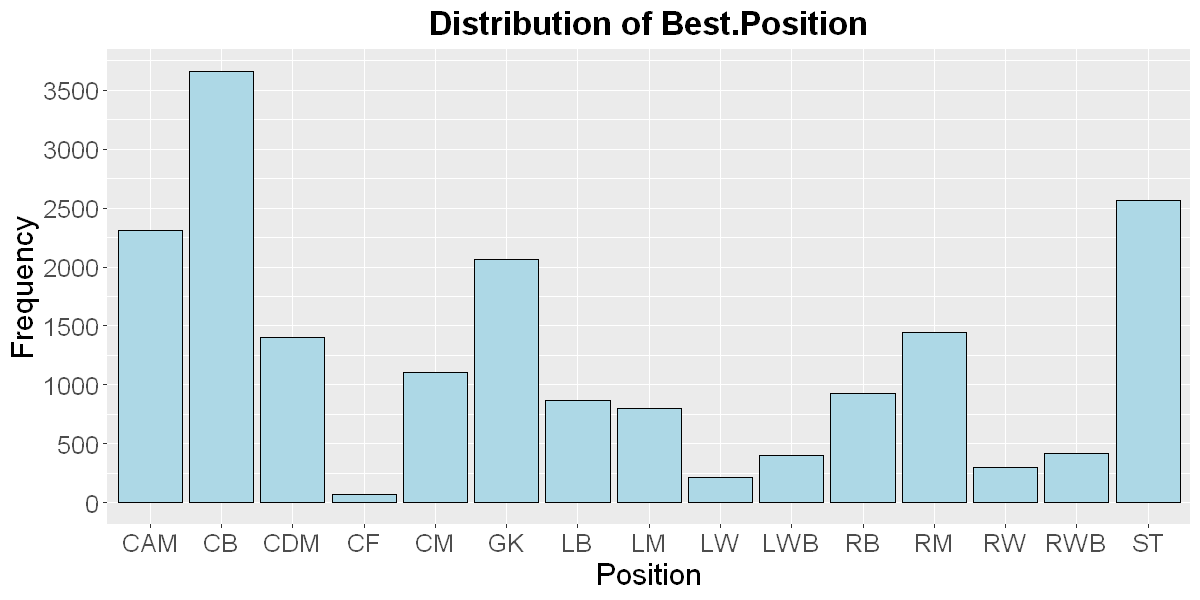

In [48]:
options(repr.plot.width=10, repr.plot.height=5) 

# plot barplot 
ggplot(data_cat, aes(x = Best.Position)) + 
  geom_bar(color = "black", fill = "lightblue") +
  
  #Add axis labels 
  labs(x = "Position", y = "Frequency", title = "Distribution of Best.Position") +
  scale_y_continuous(breaks = seq(0, 4000, 500)) +

  #Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5), 
        axis.title.x = element_text(size = 18),
        axis.title.y = element_text(size = 18),
        axis.text.x = element_text(size = 15),
        axis.text.y = element_text(size = 15))

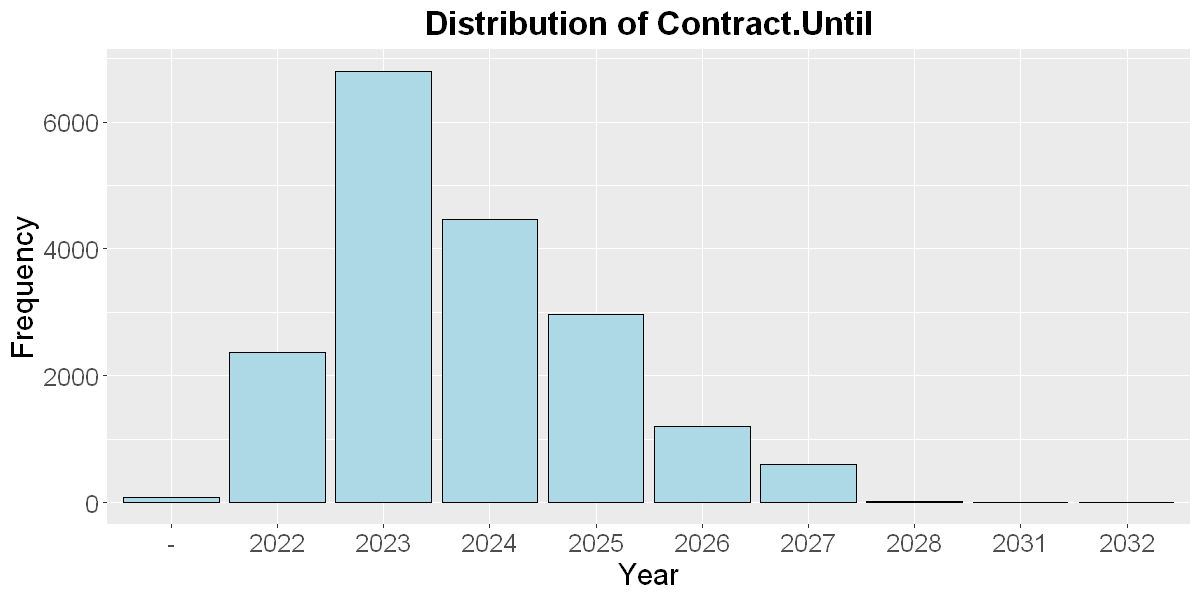

In [11]:
options(repr.plot.width=10, repr.plot.height=5) 

# plot barplot 
ggplot(data_cat, aes(x = Contract.Until)) + 
  geom_bar(color = "black", fill = "lightblue") +
  
  #Add axis labels 
  labs(x = "Year", y = "Frequency", title = "Distribution of Contract.Until") +
#   scale_y_continuous(breaks = seq(0, 4000, 500)) +

  #Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5), 
        axis.title.x = element_text(size = 18),
        axis.title.y = element_text(size = 18),
        axis.text.x = element_text(size = 15),
        axis.text.y = element_text(size = 15))

In [64]:
data_cat$Club.Jersey.Number <- as.numeric(data_cat$Club.Jersey.Number)
head(data_cat)
dim(data_cat)
sum(is.na(data_cat$Club.Jersey.Number))

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


,Best.Position,Club.Jersey.Number,Nationality,Contract.Until
,<chr>,<dbl>,<chr>,<chr>
1,CAM,30,Argentina,2023
2,CF,9,France,2023
3,ST,9,Poland,2025
4,CM,17,Belgium,2025
5,ST,7,France,2024
6,RW,11,Egypt,2023


[1] 18539     4

[1] 92

In [66]:
data_cat <- data_cat[!is.na(data_cat$Club.Jersey.Number), ]
dim(data_cat)

[1] 18447     4

In [62]:
summary(data_cat$Club.Jersey.Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    9.00   18.00   21.11   27.00   99.00 

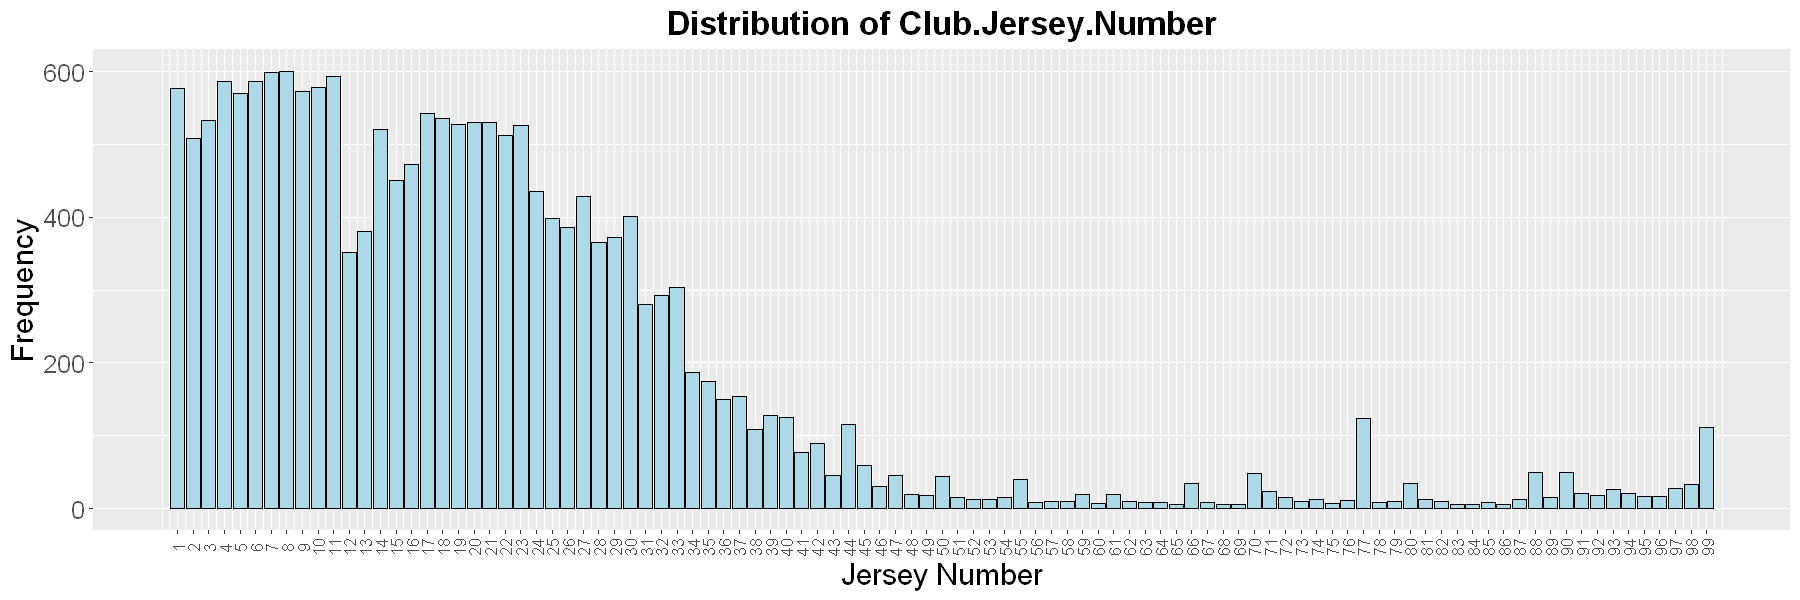

In [46]:
options(repr.plot.width=15, repr.plot.height=5) 

# plot barplot 
ggplot(data_cat, aes(x = Club.Jersey.Number)) + 
  geom_bar(color = "black", fill = "lightblue") +
  
  #Add axis labels 
  labs(x = "Jersey Number", y = "Frequency", title = "Distribution of Club.Jersey.Number") +
  scale_x_continuous(breaks = seq(1, 99, 1)) +

  #Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5), 
        axis.title.x = element_text(size = 18),
        axis.title.y = element_text(size = 18),
        axis.text.x = element_text(size = 10, angle = 90, vjust = 0.5),
        axis.text.y = element_text(size = 15))

In [36]:
#Select numerical column
num_data <- select_if(zero_rm_data, is.numeric)
colnames(num_data)
num_data <- num_data %>% select(-c("Value", "Wage"))
colnames(num_data)

[1] "Overall"      "Value"        "Wage"         "Crossing"     "Sprint.Speed"
 [6] "Acceleration" "Height"       "Weight"       "Value_log"    "Wage_log"

[1] "Overall"      "Crossing"     "Sprint.Speed" "Acceleration" "Height"      
[6] "Weight"       "Value_log"    "Wage_log"

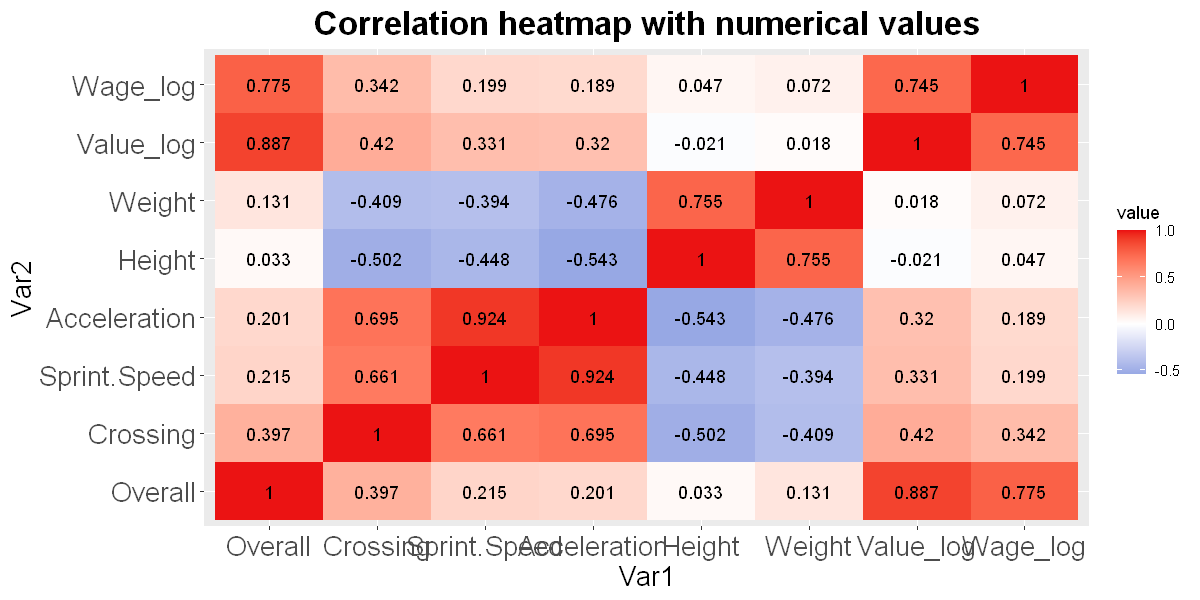

In [31]:
#Correlation of each numerical values
corr_mat <- cor(num_data)
melted_corr_mat <- melt(corr_mat)

# Create the heatmap
heatmap <- ggplot(data = melted_corr_mat, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  geom_text(aes(label = round(value, 3))) +
  scale_fill_gradient2(low = "#0066CC", mid = "white", high = "#EB1313", midpoint = 0) +
  labs(title = "Correlation heatmap with numerical values") +
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 16))

plot(heatmap)

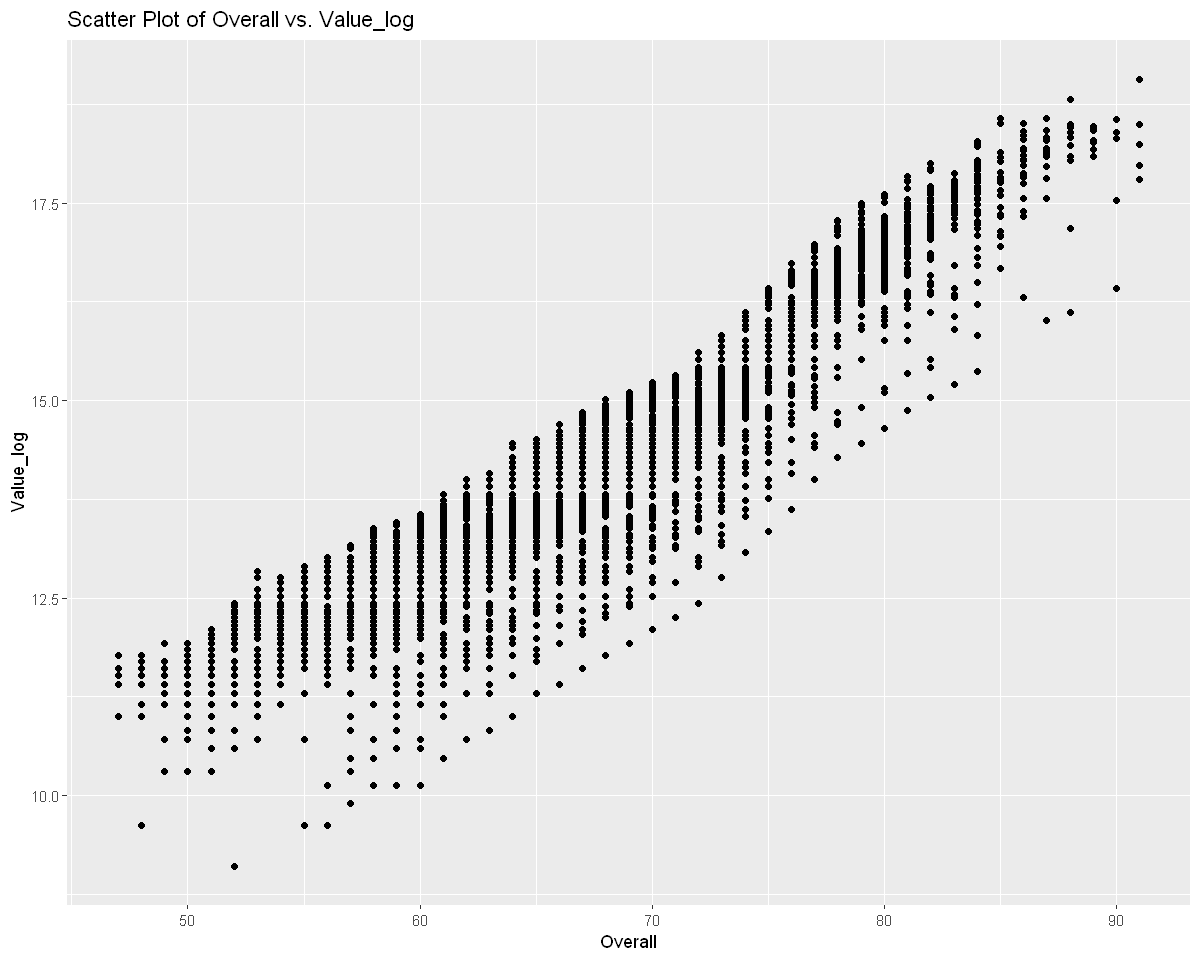

In [44]:
options(repr.plot.width=10, repr.plot.height=8) 
ggplot(num_data, aes(x = Overall, y = Value_log)) +
  geom_point() +
  labs(x = "Overall", y = "Value_log",
       title = "Scatter Plot of Overall vs. Value_log")

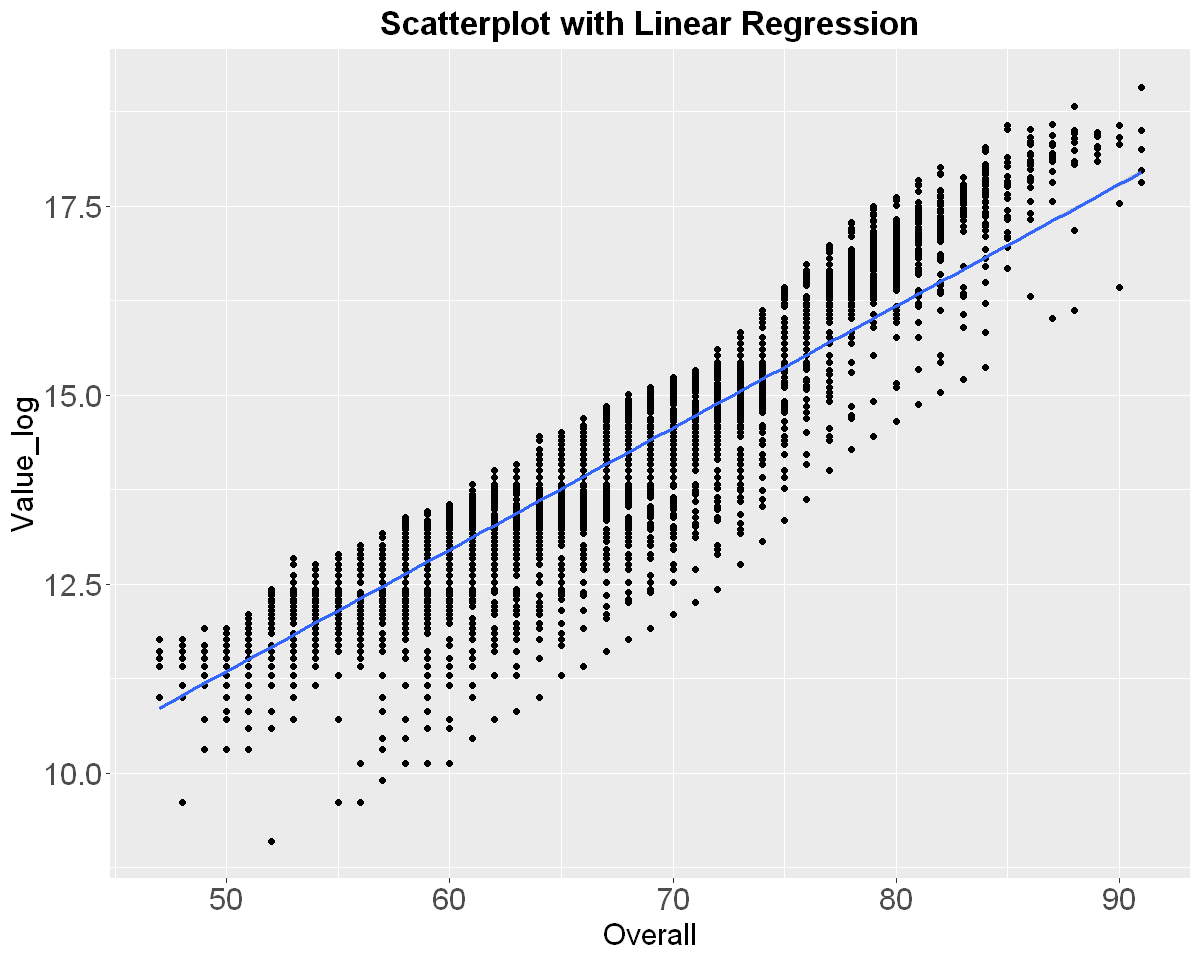

In [45]:
options(repr.plot.width=10, repr.plot.height=8) 

# Create a scatterplot with linear regression line 
ggplot(num_data, aes(x = Overall, y = Value_log)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x) +
  labs(title = "Scatterplot with Linear Regression", x = "Overall", y = "Value_log") +
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18))  

In [34]:
cor.test(num_data$Overall, num_data$Value_log, alt = "greater")


	Pearson's product-moment correlation

data:  num_cols$Overall and num_cols$Value_log
t = 260.17, df = 18433, p-value < 2.2e-16
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.8839257 1.0000000
sample estimates:
      cor 
0.8865469 


In [39]:
# Fit a linear regression model 
lm_model <- lm(Value_log ~ Overall, data = num_data)
# Summarize the model output
summary(lm_model)


Call:
lm(formula = Value_log ~ Overall, data = num_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.82839 -0.29768  0.06221  0.42362  1.58992 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.2970230  0.0409452   80.52   <2e-16 ***
Overall     0.1609666  0.0006187  260.17   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5701 on 18433 degrees of freedom
Multiple R-squared:  0.786,	Adjusted R-squared:  0.786 
F-statistic: 6.769e+04 on 1 and 18433 DF,  p-value: < 2.2e-16


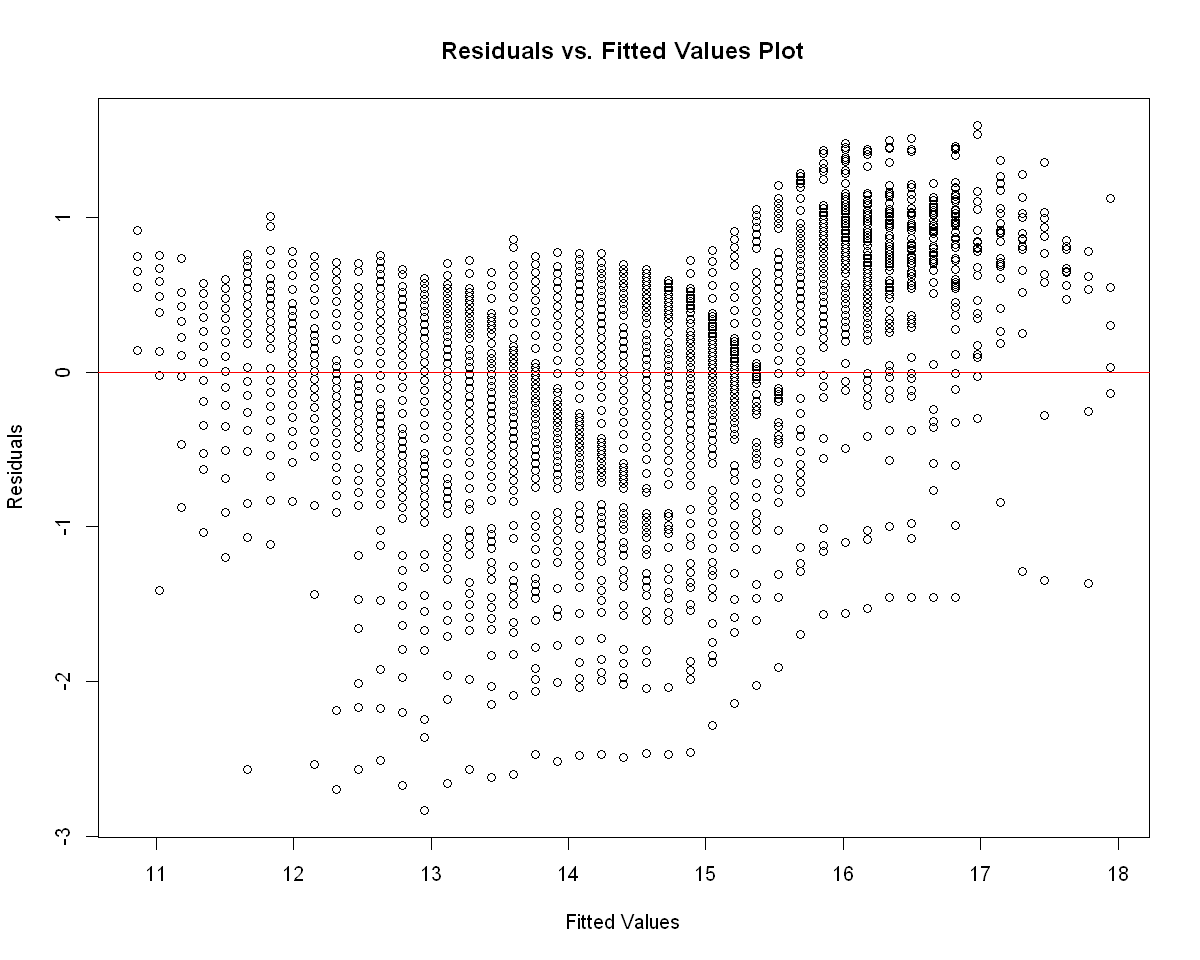

In [43]:
# plot residuals against fitted values 
plot(lm_model$fitted.values, lm_model$residuals, 
     xlab = "Fitted Values", ylab = "Residuals",
     main = "Residuals vs. Fitted Values Plot")
abline(h = 0, lty = 1, col = "red")

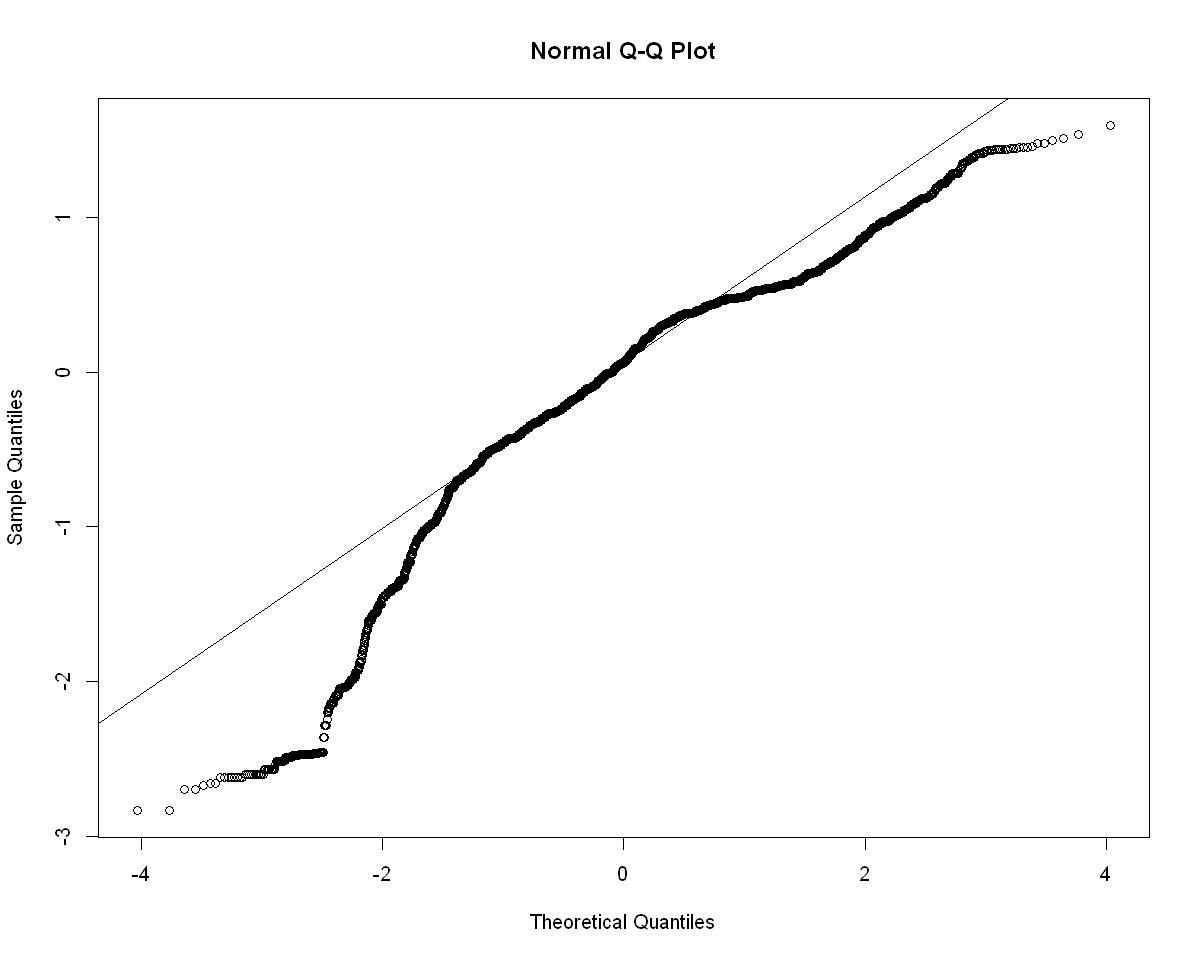

In [42]:
#Plot the qqplot of the residuals
residuals <- residuals(lm_model)
qqnorm(residuals)
qqline(residuals)

The p-value of the coefficient of Overall is less than 0.001, which means that there is strong evidence to reject the null hypothesis that the coefficient is zero, indicating that there is a significant linear relationship between Overall and Value_log.

The multiple R-squared value of the model is 0.786, which means that around 78.6% of the variation in Value_log is explained by the linear relationship with Overall.

The residual standard error is 0.5701, which indicates the average distance between the observed Value_log and the predicted values of Value_log from the regression line.

The F-statistic of the model is 6.769e+04 with 1 and 18433 degrees of freedom, which is very high and the p-value is less than 0.001, indicating that the model is highly significant in predicting the Value_log based on Overall.

In [46]:
# Fit a linear regression model
lm_model <- lm(Value_log ~ Overall+Wage_log, data = num_data)
# Summarize the model output
summary(lm_model)


Call:
lm(formula = Value_log ~ Overall + Wage_log, data = num_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.78190 -0.30327  0.07692  0.40080  1.66257 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.5810201  0.0414191   86.46   <2e-16 ***
Overall     0.1404385  0.0009589  146.46   <2e-16 ***
Wage_log    0.1324830  0.0047944   27.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5587 on 18432 degrees of freedom
Multiple R-squared:  0.7945,	Adjusted R-squared:  0.7945 
F-statistic: 3.563e+04 on 2 and 18432 DF,  p-value: < 2.2e-16


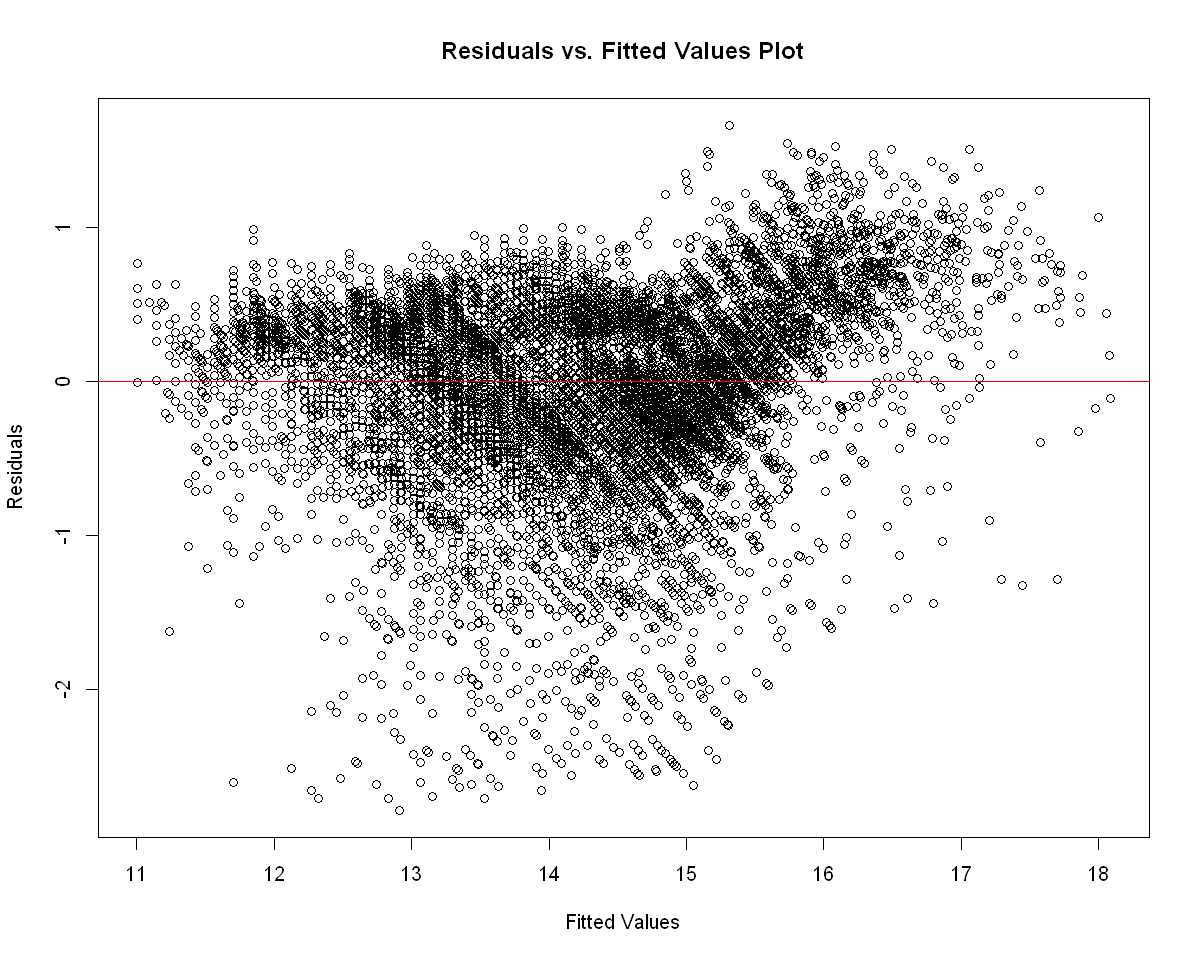

In [47]:
# plot residuals against fitted values
plot(lm_model$fitted.values, lm_model$residuals, 
     xlab = "Fitted Values", ylab = "Residuals",
     main = "Residuals vs. Fitted Values Plot")
abline(h = 0, lty = 1, col = "red")

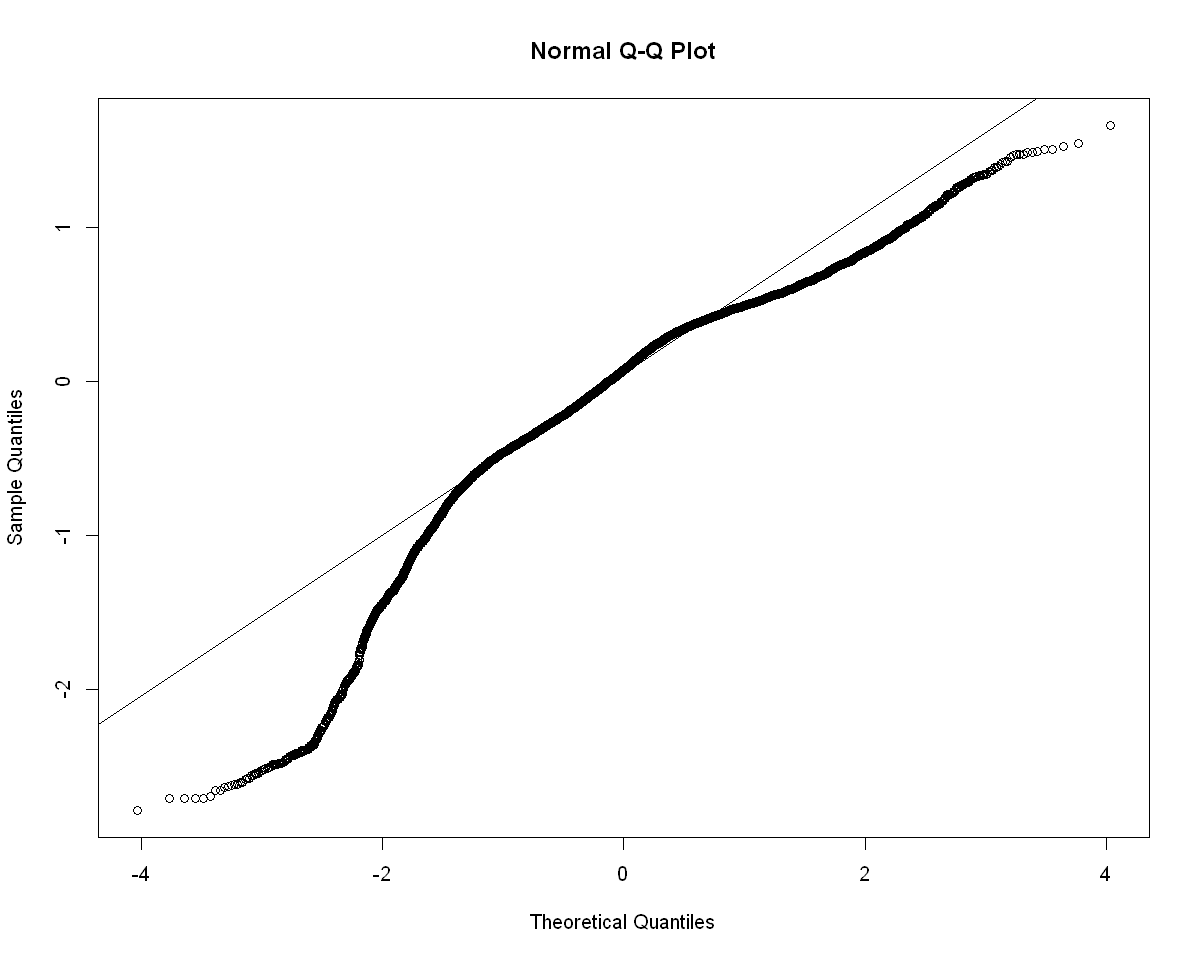

In [48]:
#Plot the qqplot of the residuals
residuals <- residuals(lm_model)
qqnorm(residuals)
qqline(residuals)

In [78]:
#Extract Best.Position and Club.Jersey.Number
data_2 <- data_cat[c('Best.Position', 'Club.Jersey.Number')]
sapply(data_2, class)
dim(data_2)

Best.Position Club.Jersey.Number 
       "character"          "numeric"

[1] 18447     2

In [79]:
#Check the categories in each column
data_2[] <- lapply(data_2, factor)
sapply(data_2, class)
sapply(data_2, levels)

Best.Position Club.Jersey.Number 
          "factor"           "factor"

$Best.Position
 [1] "CAM" "CB"  "CDM" "CF"  "CM"  "GK"  "LB"  "LM"  "LW"  "LWB" "RB"  "RM" 
[13] "RW"  "RWB" "ST" 

$Club.Jersey.Number
 [1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35" "36" "37" "38" "39" "40" "41" "42" "43" "44" "45"
[46] "46" "47" "48" "49" "50" "51" "52" "53" "54" "55" "56" "57" "58" "59" "60"
[61] "61" "62" "63" "64" "65" "66" "67" "68" "69" "70" "71" "72" "73" "74" "75"
[76] "76" "77" "78" "79" "80" "81" "82" "83" "84" "85" "86" "87" "88" "89" "90"
[91] "91" "92" "93" "94" "95" "96" "97" "98" "99"

In [80]:
#Filter by Club.Jersey.Number which is between 1 and 11
data_2$Club.Jersey.Number <- as.numeric(data_2$Club.Jersey.Number)
data_filtered <- filter(data_2, Club.Jersey.Number >= 1 & Club.Jersey.Number <= 11)
dim(data_filtered)

[1] 6305    2

In [81]:
#Check the categories in each column
data_filtered[] <- lapply(data_filtered, factor)
sapply(data_filtered, levels)

$Best.Position
 [1] "CAM" "CB"  "CDM" "CF"  "CM"  "GK"  "LB"  "LM"  "LW"  "LWB" "RB"  "RM" 
[13] "RW"  "RWB" "ST" 

$Club.Jersey.Number
 [1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11"

In [82]:
#Create another column which groups Best.Position
data_filtered <- data_filtered %>%
  mutate(Position.Group = case_when(
    Best.Position == 'GK' ~ 'Gk',
    Best.Position %in% c('CB', 'LB', 'RB', 'LWB', 'RWB') ~ 'Def',
    Best.Position %in% c('CDM', 'CAM', 'LM', 'RM', 'CM') ~ 'Mid',
    Best.Position %in% c('LW', 'RW', 'ST', 'CF') ~ 'Atk',
  ))
data_filtered[] <- lapply(data_filtered, factor)
sapply(data_filtered, levels)
head(data_filtered, 20)

$Best.Position
 [1] "CAM" "CB"  "CDM" "CF"  "CM"  "GK"  "LB"  "LM"  "LW"  "LWB" "RB"  "RM" 
[13] "RW"  "RWB" "ST" 

$Club.Jersey.Number
 [1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11"

$Position.Group
[1] "Atk" "Def" "Gk"  "Mid"

,Best.Position,Club.Jersey.Number,Position.Group
,<fct>,<fct>,<fct>
1,CF,9,Atk
2,ST,9,Atk
3,ST,7,Atk
4,RW,11,Atk
5,GK,1,Gk
6,GK,1,Gk
7,ST,7,Atk
8,CB,4,Def
9,ST,10,Atk


In [83]:
#Drop Club.Jersey.Number
data_filtered <- subset(data_filtered, select = -c(Best.Position))
str(data_filtered)

'data.frame':	6305 obs. of  2 variables:
 $ Club.Jersey.Number: Factor w/ 11 levels "1","2","3","4",..: 9 9 7 11 1 1 7 4 10 10 ...
 $ Position.Group    : Factor w/ 4 levels "Atk","Def","Gk",..: 1 1 1 1 3 3 1 2 1 1 ...


In [97]:
#Convert the data into a table
data_table <- table(data_filtered$Club.Jersey.Number, data_filtered$Position.Group)
data_table

    
     Atk Def  Gk Mid
  1    0   0 577   0
  2    8 457   1  43
  3    3 500   0  30
  4    3 469   0 114
  5    6 436   0 128
  6    3 288   0 295
  7  157  45   0 397
  8   34  51   0 515
  9  508   0   0  65
  10 162  11   0 406
  11 246  37   0 310

In [85]:
#Drop Group 1 and Gk
data_table_2 <- data_table[c(2:11), c(1, 2, 4)]
data_table_2

    
     Atk Def Mid
  2    8 457  43
  3    3 500  30
  4    3 469 114
  5    6 436 128
  6    3 288 295
  7  157  45 397
  8   34  51 515
  9  508   0  65
  10 162  11 406
  11 246  37 310

In [105]:
# Get row and column sums of data_table_2
row_sums <- apply(data_table_2, 1, sum)
col_sums <- apply(data_table_2, 2, sum)

# Calculate total count
total_count <- sum(data_table_2)

# Calculate expected counts
expected_table <- outer(row_sums, col_sums, "*") / total_count

# Convert the matrix into a table
expected_table <- as.table(as.matrix(expected_table[,]))
dimnames(expected_table) <- list(c(seq(2,11,1)), colnames(expected_table))

#Round the cell value
round(expected_table, 2)

      Atk    Def    Mid
2  100.23 203.48 204.28
3  105.17 213.50 214.34
4  115.62 234.73 235.65
5  112.47 228.32 229.21
6  115.62 234.73 235.65
7  118.19 239.93 240.88
8  118.39 240.34 241.28
9  113.06 229.52 230.42
10 114.24 231.92 232.83
11 117.01 237.53 238.46

In order to determine whether the association between Club.Jersey.Number and Position.Group is statistically significant, we perform the **chi-square test**.
Step 1: Formula the hypotheses <br>
H0: There is no difference in the distribution of jersey number and the best position. <br>
H1: There is significant difference in the distribution of jersey number and the best position.

Step 2: Convert the table into a two-way contingency table.

In [32]:
#Calculating the key elements for computing the contingency table
total_rows <- rowSums(data_table)
total_cols <- colSums(data_table)
total <- sum(total_rows)
nrow <- nrow(data_table)
ncol <- ncol(data_table)

#Create the contingency table
contingency_table <- matrix(nrow = nrow, ncol = ncol)

for (r in 1:nrow){
    for (c in 1:ncol){
        contingency_table[r, c] <- total_rows[r]* total_cols[c]/total
    }
}
contingency_table

1   2   3   4   5   6   7   8   9  10  11 
577 509 533 586 570 586 599 600 573 579 593

Atk  Def   Gk  Mid 
1130 2294  578 2303

[1] 6305

103.41158,209.9347,52.89548,210.7583
91.22443,185.1937,46.66170,185.9202
95.52577,193.9258,48.86186,194.6866
105.02458,213.2092,53.72054,214.0457
102.15702,207.3878,52.25377,208.2014
105.02458,213.2092,53.72054,214.0457
107.35448,217.9391,54.91229,218.7941
107.53370,218.3029,55.00397,219.1594
102.69469,208.4793,52.52879,209.2972
103.77002,210.6623,53.07883,211.4888
106.27914,215.7561,54.36225,216.6025


Based on the contingency table, check the conditions that is suitable for performing a chi-square test. <br>
1) All expected counts are greater or equal to 5. <br>
2) None of the cells in the contingency table have an observed count of 0. <br>
3) The data is independent. <br>
The contingency table meets all these conditions, thus we can perform chi-square test. 

In [33]:
#Perform chi-square test
chisq.test(data_table)


	Pearson's Chi-squared test

data:  data_table
X-squared = 12083, df = 30, p-value < 2.2e-16


The p-value of the chi-square test is less than 0.05 which means that there is strong evidence to reject the null hypothesis that there is no difference in the distribution of jersey number and the best position, indicating that there is a significant association between Club.Jersey.Number and Position.Group.

Grouping by <br>
1 - GoalKeeper  <br>
2-5, Defender <br>
6, 8, 10 - Midfielder <br> 
7, 9, 11 - Attacker <br> 
GK - Goalkeeper 

In [98]:
rownames(data_table) <- c(1:11)

# Group rows and perform colSums
group1 <- c(1)
group2 <- c(2:5)
group3 <- c(6, 8, 10)
group4 <- c(7, 9, 11)

grouped_table <- data.frame(
  Group = c("Group 1", "Group 2", "Group 3", "Group 4"),
  Atk = c(sum(data_table[group1, "Atk"]), 
          sum(data_table[group2, "Atk"]),
          sum(data_table[group3, "Atk"]),
          sum(data_table[group4, "Atk"])),
  Def = c(sum(data_table[group1, "Def"]), 
          sum(data_table[group2, "Def"]),
          sum(data_table[group3, "Def"]),
          sum(data_table[group4, "Def"])),
  Gk = c(sum(data_table[group1, "Gk"]), 
         sum(data_table[group2, "Gk"]),
         sum(data_table[group3, "Gk"]),
         sum(data_table[group4, "Gk"])),
  Mid = c(sum(data_table[group1, "Mid"]), 
          sum(data_table[group2, "Mid"]),
          sum(data_table[group3, "Mid"]),
          sum(data_table[group4, "Mid"]))
)

grouped_table

Group,Atk,Def,Gk,Mid
<chr>,<int>,<int>,<int>,<int>
Group 1,0,0,577,0
Group 2,20,1862,1,315
Group 3,199,350,0,1216
Group 4,911,82,0,772


In [96]:
#Convert the dataframe into table
data_table <- as.table(as.matrix(grouped_table[, -1]))
dimnames(data_table) <- list(grouped_table$Group, colnames(data_table))
data_table

         Atk  Def   Gk  Mid
Group 1    0    0  577    0
Group 2   20 1862    1  315
Group 3  199  350    0 1216
Group 4  911   82    0  772

Number of cases in table: 6305 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 10617, df = 9, p-value = 0

In [97]:
#Drop Group 1 and GK
data_table_2 <- data_table[c(2:4), c(1, 2, 4)]
data_table_2
summary(data_table_2)

         Atk  Def  Mid
Group 2   20 1862  315
Group 3  199  350 1216
Group 4  911   82  772

Number of cases in table: 5727 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 3929, df = 4, p-value = 0